## Optimizing Lead Conversion with Machine Learning Models

### Objective
This project’s goal is to develop a predictive model to identify high-conversion leads, improving the current *lead conversion rate from 38%*. Currently, the sales team relies on manual lead scoring based on limited data and employee intuition, which leads to inefficiencies and missed opportunities. By building a **data-driven model** that assigns a score to each lead, the team can prioritize high-potential prospects and allocate their time more effectively, leading to increased efficiency and conversion rates.<br><br>
The success of this model will be evaluated not only by its ***accuracy***, but by its ***precision*** and ***recall***:<br>
***Precision*** ensures the model correctly identifies leads most likely to convert, reducing time spent on false positives. This allows the sales team to focus on high-value prospects, maximizing efficiency.<br>
***Recall*** ensures that the model captures a wide range of potential leads, ensuring that valuable opportunities are not missed, optimizing the overall conversion funnel.<br>
By leveraging **predictive modeling**, this project aims to improve both the accuracy and efficiency of lead prioritization, ultimately enhancing the sales funnel and boosting conversion rates. This will significantly improve over the current manual scoring process, which is based on subjective judgment rather than data-driven insights.




### Table of Contents 
###### (Hyperlinks don't always land on exact place, some scrolling down might be needed to get to the desired section)

[Data Analysis Project](#data-analysis-project)
- [Table of Contents](#table-of-contents)
- [Import Dependencies](#import-dependencies)
- [Data Preprocessing](#data-preprocessing)
  - [Data Loading](#data-loading)
  - [Data Inspection](#data-inspection)
  - [Exploratory Data Analysis EDA](#exploratory-data-analysis-eda)
    - [Handling "Select" Values](#handling-"select"-values)
    - [Standardizing Column Names](#standardizing-column-names)
    - [Calculating Missing Values](#calculating-missing-values)
    - [Dropping Columns with Excessive Missing Data](#dropping-columns-with-excessive-missing-data)
    - [Individual Feature Analysis](#individual-feature-analysis)
    - [Correlation Heatmap of Numerical FeaturesCorrelations](#correlation-heatmap-of-numerical-features)
  - [Clean Data Frame](#clean-data-fame)
  - [Feature Engineering and Transformation](#feature-engineering-and-transformation)
    - [Numerical Scaling](#numerical-scaling)
    - [Categorical Encoding](#categorical-encoding)
- [Model Implementation](#model-implementation)
    - [Define Target Variable](#define-target-variable)
    - [Calculate Baseline](#calculate-baseline)
      - [Convertion Ratio](#convertion-ratio)
      - [Naive Prediction](#naive-prediction)
    - [Supervised Learning](#supervised-learning)
      - [Logistic Regression](#logistic-regression)
        - [Baseline Logistic Regression](#baseline-logistic-regression)
        - [Logistic Regression Optimization](#logistic-regression-optimization)
        - [PCA](#pca)
      - [Random Forest](#random-forest)
        - [Random Forests improvement from Baseline Logistic Regression](#random-forests-improvement-from-baseline-logistic-regression)
        - [Random Forests Visualizations](#random-forests-visualizations)
          - [Feature Importance Visualization](#feature-importance-visualization)
          - [ROC Curves Comparison Logistic Regression and Random Forest](#roc-curves-comparison-logistic-regression-and-random-forest)
        - [Random Forest Optimization](#random-forest-optimization)
          - [Overfitting Random Forest](#overfitting-random-forest)
          - [Hyperparameter Tuning GridSearchCV](#hyperparameter-tuning-gridsearchcv)
          - [Feature Selection](#feature-selection)
      - [Deep Learning (Neural Networks)](#deep-learning-neural-networks)
          - [Deep Learning Optimization - Keras-tuner](#deep-learning-optimization---keras-tuner)
          - [ROC Curves Logistic Regression, Random Forest and Neural Network](#roc-curves-logistic-regression-random-forest-and-neural-network)
- [Conclusions](#conclusions)
  - [Models Performance](#models-performance)

---
---

## Import Dependencies

In [48]:
#!pip install keras-tuner

In [49]:
#pip install plotly

In [50]:
# Import dependencies

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
#%matplotlib inline
import numpy as np

import pandas as pd
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
import plotly.express as px

from scipy.stats import skew, norm
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_classification
#from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, export_text

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras_tuner import Hyperband

[Back to Top](#table-of-contents)

---
---

## Data Preprocessing

### Data Loading
- Loading the `Leads.csv` data from the `Resources` folder into a Pandas DataFrame.

In [51]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_leads_original = pd.read_csv("Resources/Leads.csv")

#create a copy of original to start manipulation
df_leads = df_leads_original.copy()

# Review the DataFrame
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [52]:
#checking total rows and cols in dataset
df_leads.shape

(9240, 37)

The Leads.csv has 9,240 rows and 37 columns <br>
Below is a check of the data types for each column.

##### original index numbers
Here is the original index of the dataset's columns.

In [53]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Reviewing summary of descriptive statistics for numerical columns

In [54]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


[Back to Top](#table-of-contents)

---

### Exploratory Data Analysis EDA

##### Handling "Select" Values

The "Select" values were replaced with ***NaN*** to indicate that the user did not choose any option from the available selections. This ensures that these entries are treated as missing data during analysis.

In [55]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

##### Standardizing Column Names

All column names were converted to ***lowercase*** for consistency and ease of use. This ensures uniformity throughout the dataset and simplifies column referencing in subsequent analysis.

In [56]:
# changing  all columns values to lower case
for col in df_leads.columns:
    df_leads[col] = df_leads[col].apply(lambda s: s.lower() if type(s)==str else s)

##### Calculating Missing Values

The number of null values was calculated for each column to assess the extent of missing data. This step helps identify incomplete entries that may require imputation or removal during the data cleaning process.

In [57]:
#Review null values per column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [58]:
# Calculate the percentage of null values for each column
null_percentage = (df_leads.isnull().sum() / len(df_leads)* 100) .round(2)

# Display the percentage of null values per column
print(null_percentage)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### Dropping Columns with Excessive Missing Data

Columns with more than 55% missing values were dropped from the dataset. This threshold was set to remove features with substantial gaps, ensuring that the remaining data is more complete and reliable for analysis.

*initial cut-off for missing values was set 45%, but it was adjusted to 55% to retain the "Lead Quality" feature. The significance of this feature will be further examined in the column analysis section.*

In [59]:
cols = df_leads.columns

for i in cols:
    if (100 * (df_leads[i].isnull().sum() / len(df_leads.index))) >= 55:
        df_leads.drop(i, axis=1, inplace=True)

# Check the updated DataFrame
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Dropped** with >55% null value: <br>
- 13 How did you hear about X Education </br>
- 28 Lead Profile </br>

##### Individual Feature Analysis
Given the extensive number of columns in the dataset, I will combine the EDA and Feature Engineering processes in a single section for efficiency. To maintain clarity and ensure easy reference, I will retain the [original index numbers](#original-index-numbers) of the dataset's columns and conduct a detailed analysis of each column, one by one.


In [60]:
for i, col in enumerate(df_leads.columns):
    print(f"{i} - {col}")

0 - Prospect ID
1 - Lead Number
2 - Lead Origin
3 - Lead Source
4 - Do Not Email
5 - Do Not Call
6 - Converted
7 - TotalVisits
8 - Total Time Spent on Website
9 - Page Views Per Visit
10 - Last Activity
11 - Country
12 - Specialization
13 - What is your current occupation
14 - What matters most to you in choosing a course
15 - Search
16 - Magazine
17 - Newspaper Article
18 - X Education Forums
19 - Newspaper
20 - Digital Advertisement
21 - Through Recommendations
22 - Receive More Updates About Our Courses
23 - Tags
24 - Lead Quality
25 - Update me on Supply Chain Content
26 - Get updates on DM Content
27 - City
28 - Asymmetrique Activity Index
29 - Asymmetrique Profile Index
30 - Asymmetrique Activity Score
31 - Asymmetrique Profile Score
32 - I agree to pay the amount through cheque
33 - A free copy of Mastering The Interview
34 - Last Notable Activity


Navigate Through Feature Sections: EDA and Feature Engineering

- [0 - Prospect ID](#0---proposect-id) </br>
- [1 - Lead Number](#1---lead-number) </br>
- [2 - Lead Origin](#2---lead-origin) </br>
- [3 - Lead Source](#3---lead-source) </br>
- [4 - Do Not Email](#4---do-not-email) </br>
- [5 - Do Not Call](#5---do-not-call) </br>
- [6 - Converted](#6---converted) </br>
- [7 - TotalVisits](#7---totalvisits) </br>
- [8 - Total Time Spent on Website](#8---total-time-spent-on-website) </br>
- [9 - Page Views Per Visit](#9---page-views-per-visit) </br>
- [10 - Last Activity](#10---last-activity) </br>
- [11 - Country](#11---country) </br>
- [12 - Specialization](#12---specialization) </br>
- [13 - How did you hear about X Education](#13---how-did-you-hear-about-x-education)  *dropped* </br>
- [14 - What is your current occupation](#14---what-is-your-current-occupation) </br>
- [15 - What matters most to you in choosing a course](#15---what-matters-most-to-you-in-choosing-a-course) </br>
- [16 - Search](#16---search) </br>
- [17 - Magazine](#17---magazine) </br>
- [18 - Newspaper Article](#18---newspaper-article) </br>
- [19 - X Education Forums](#19---x-education-forums) </br>
- [20 - Newspaper](#20---newspaper) </br>
- [21 - Digital Advertisement](#21---digital-advertisement) </br>
- [22 - Through Recommendations](#22---through-recommendations) </br>
- [23 - Receive More Updates About Our Courses](#23---receive-more-updates-about-our-courses) </br>
- [24 - Tags](#24---tags) </br>
- [25 - Lead Quality](#25---lead-quality) </br>
- [26 - Update me on Supply Chain Content](#26---update-me-on-supply-chain-content) </br>
- [27 - Get updates on DM Content](#27---get-updates-on-dm-content) </br>
- [28 - Lead Profile](#28---lead-profile)  *dropped* </br> 
- [29 - City](#29---city) </br>
- [30 - Asymmetrique Activity Index](#30---asymmetrique-activity-index) </br>
- [31 - Asymmetrique Profile Index](#31---asymmetrique-profile-index) </br>
- [32 - Asymmetrique Activity Score](#32---asymmetrique-activity-score) </br>
- [33 - Asymmetrique Profile Score](#33---asymmetrique-profile-score) </br>
- [34 - I agree to pay the amount through cheque](#34---i-agree-to-pay-the-amount-through-cheque) </br>
- [35 - A free copy of Mastering The Interview](#35---a-free-copy-of-mastering-the-interview) </br>
- [36 - Last Notable Activity](#36---last-notable-activity) </br>

Reviewing if the 0 - Prospect ID and 1 - Lead Number columns have any duplicates

In [61]:
# Check for duplicate values in the "Lead Number" column
duplicate_count_LN = df_leads["Lead Number"].duplicated().sum()
print(f"Number of duplicate 'Lead Number' entries: {duplicate_count_LN}")

# Check for duplicate values in the "Lead Number" column
duplicate_count_PID = df_leads["Prospect ID"].duplicated().sum()
print(f"Number of duplicate 'Prospect ID' entries: {duplicate_count_PID}")

Number of duplicate 'Lead Number' entries: 0
Number of duplicate 'Prospect ID' entries: 0


##### 0 - Prospect ID 

##### 1 - Lead Number
Both are unique identification numbers, they not relevent to this analysis, so they will be **dropped**. 

In [62]:
#dropping Lead Number columns 
df_leads.drop(["Lead Number","Prospect ID"], axis=1, inplace = True)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,no,no,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,no,no,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,no,no,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,no,no,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,no,no,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


##### 2 - Lead Origin

In [63]:
#Lead Origin
df_leads['Lead Origin'].value_counts(dropna=False)

Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: count, dtype: int64

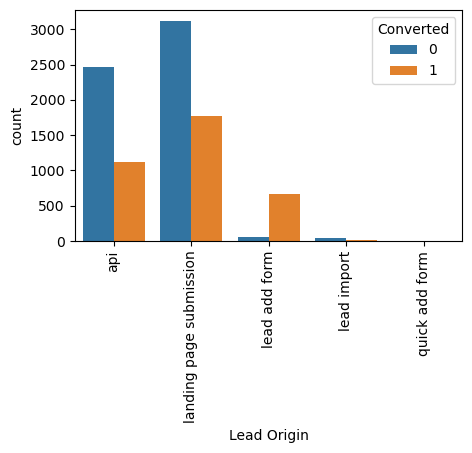

In [64]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

***Feature Engineering: Category Aggregation*** to streamline the dataset and reduce the number of columns generated by One-Hot Encoding

In [65]:
# Aggregating less frequent categories into "Others"
df_leads['Lead Origin'] = df_leads['Lead Origin'].replace(['lead add form', 'lead import', 'quick add form'], 'Others')

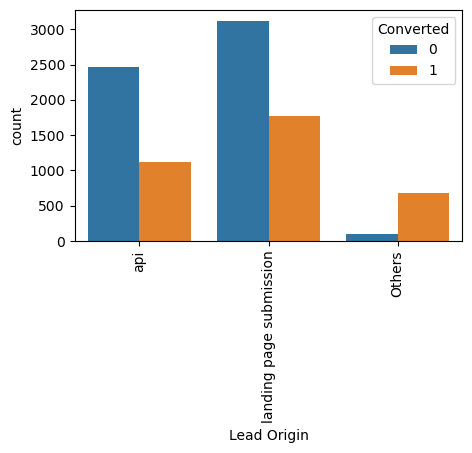

In [66]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

***Marketing insight*** "Lead Origin" helps identify key sources of leads, with "Landing Page Submission" and "API" as the top performers. By focusing on improving the conversion rate from these sources and generating more leads from high-conversion sources like "Lead Add Form," marketing efforts can be more effectively targeted.

"Lead Origin" shows clear differentiation in conversion rates across categories, with "API" and "Landing Page Submission" generating the highest number of leads and conversions, for this reason I will keep it to feed into the model to hel p  understand lead behavior.

*2 - Lead Origin Keep*

##### 3 - Lead Source 

In [67]:
missing_lead_source = df_leads['Lead Source'].isna().sum()
print(f'Missing values in "Lead Source" column: {missing_lead_source}')

Missing values in "Lead Source" column: 36


In [68]:
#checking for mode value
df_leads['Lead Source'].value_counts()

Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

***EDA - Imputing Missing Values***<br>
Since the proportion of missing values (NaN) is minimal, they have been imputed using the mode

In [69]:
# Imputing NaN values with "Not Specified"
df_leads['Lead Source'] = df_leads['Lead Source'].replace(np.nan, 'google')

In [70]:

# Replace variations with consistent names
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'facebook': 'social media'})
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'youtube': 'social media'})

# Remove rows where 'Lead Source' has irrelevant or test values
df_leads = df_leads[~df_leads['Lead Source'].isin(['testone'])]

# Replace synonyms with a consistent value
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'welearnblog_home': 'welearn', 'WeLearn': 'welearn'})


# Recheck the value counts
print(df_leads['Lead Source'].value_counts())


Lead Source
google               2909
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
social media           57
bing                    6
click2call              4
press_release           2
welearn                 2
live chat               2
youtubechannel          1
blog                    1
pay per click ads       1
nc_edm                  1
Name: count, dtype: int64


***Feature Engineering - Binning*** Remove options with  values under 50 to reduce the amount of columns during OHE

In [71]:
# Define a cutoff value
cutoff_value = 200

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Lead Source'].value_counts()[df_leads['Lead Source'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Lead Source'] = df_leads['Lead Source'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Lead Source'].value_counts())

Lead Source
google            2909
direct traffic    2543
olark chat        1755
organic search    1154
reference          534
Other              344
Name: count, dtype: int64


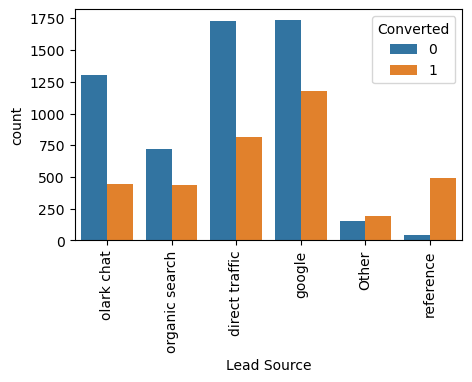

In [72]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()


***Marketing Insight***<br>
"Lead Source" provides critical insights for targeted marketing strategies, revealing that certain sources, like references and Google, generate higher quality leads. This can guide marketing efforts to focus on the most effective channels for conversion.

Different lead sources show varied conversion rates, with references and Google performing better in terms of conversions. This indicates that "Lead Source" is an important feature in distinguishing between higher and lower quality leads, making it valuable for predictive modeling.

*3- Lead Sources  - Keep* 


#### 4 - Do Not Email

 ##### 5 - Do Not Call
Analyzing Both Features jointly as they are binary (Yes/No)

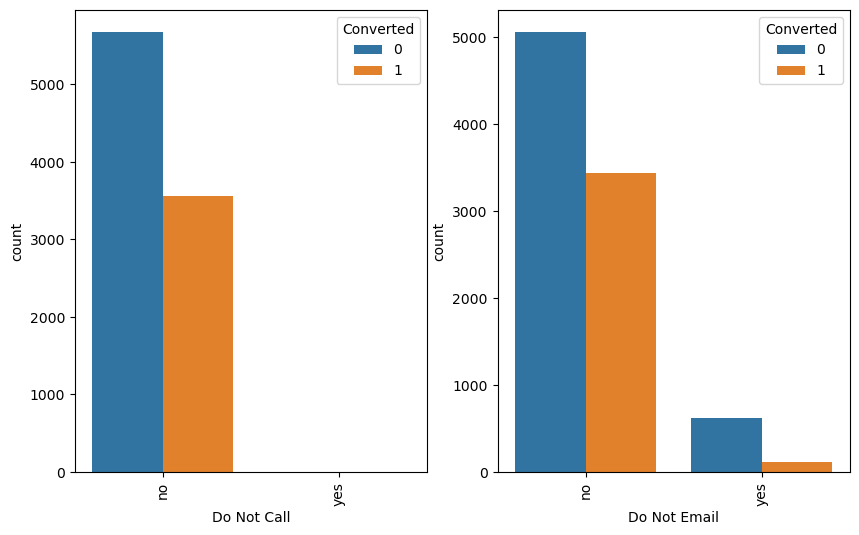

In [73]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(10, 6))

# Plotting 'Do Not Call' with 'Converted' as hue
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Call', hue='Converted', data=df_leads, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plotting 'Do Not Email' with 'Converted' as hue
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Email', hue='Converted', data=df_leads, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

***Feature Engineering*** - Binary Encoding  
Since both features are binary ("yes" or "no"), converting them into numerical values 0 and 1 will be useful for the model.

In [74]:
df_leads['Do Not Call'] = df_leads['Do Not Call'].map({'no': 0, 'yes': 1})
df_leads['Do Not Email'] = df_leads['Do Not Email'].map({'no': 0, 'yes': 1})

***Marketing Insight***<br>
The "Do Not Email" feature seems to have a stronger negative impact on conversion rates compared to "Do Not Call." This suggests that limiting email communication could reduce lead conversions, highlighting the importance of maintaining email contact.

Both "Do Not Email" and "Do Not Call" provide valuable information for predicting lead behavior. Leads that do not want to be contacted may be less likely to convert, making these features important for modeling conversion likelihood.

*4 - Do Not Email - Keep*<br>
*5 - Do Not Call - Keep*

##### 6 - Converted
**Converted** is the dependent variable (y) that we are trying to optimize. 

*6 - Converted - Keep*

##### 7 - TotalVisits

Plotting a box plot to analyze the "TotalVisits" feature, as it is numerical. This will help identify any potential outliers that could impact the analysis.


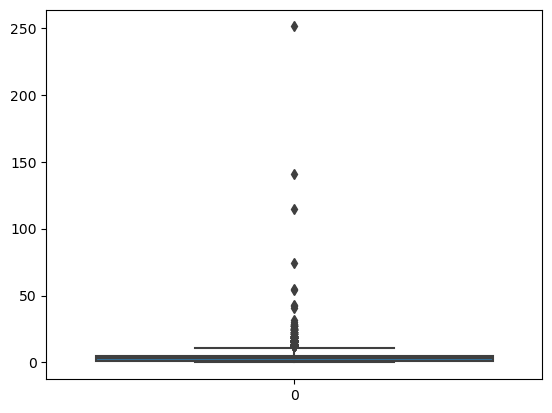

In [75]:
#Total Visits
#visualizing spread of variable

sns.boxplot(df_leads['TotalVisits'])
plt.show()


**EDA** - Handling Outliers  </br>
Outliers were capped at the 95th percentile to improve the analysis and visualization, allowing for a clearer understanding of trends without the distortion caused by extreme values.


In [76]:
#checking percentile values for "Total Visits"

df_leads['TotalVisits'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    9102.000000
mean        3.445067
std         4.855092
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

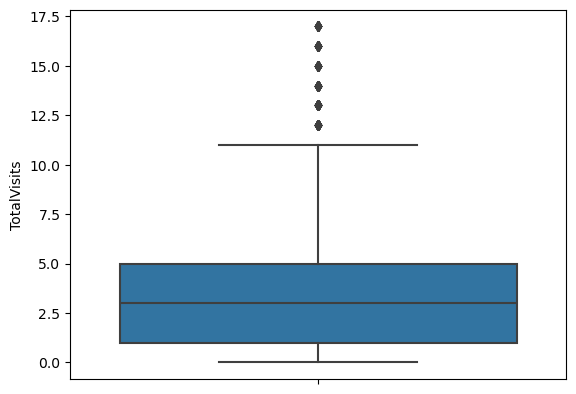

In [77]:
#Outlier Treatment (EDA): Remove top & bottom 5% of the Column Outlier values

Q3 = df_leads.TotalVisits.quantile(0.99)
df_leads = df_leads[(df_leads.TotalVisits <= Q3)]
Q1 = df_leads.TotalVisits.quantile(0.01)
df_leads = df_leads[(df_leads.TotalVisits >= Q1)]
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

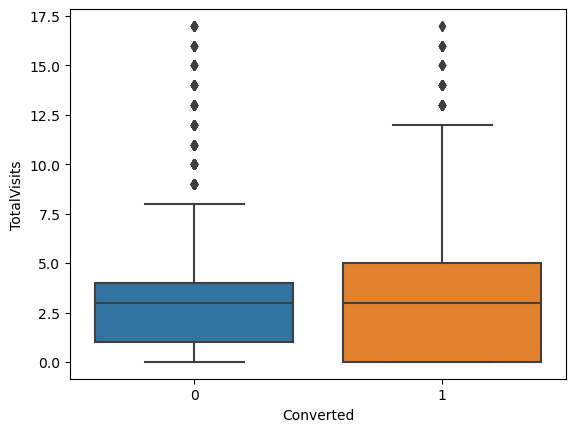

In [78]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)

Plotting in histogram and density

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


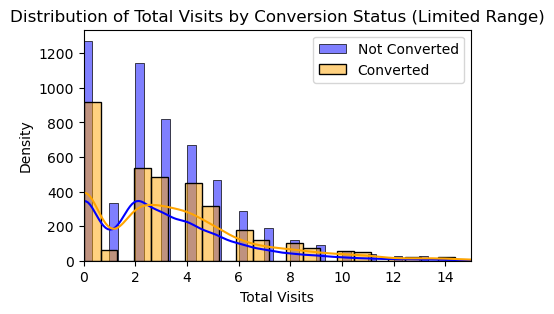

In [79]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(5, 3))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]['TotalVisits'], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]['TotalVisits'], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of Total Visits by Conversion Status (Limited Range)')
plt.xlabel('Total Visits')
plt.ylabel('Density')
plt.xlim(0, 15) 
plt.legend()

plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


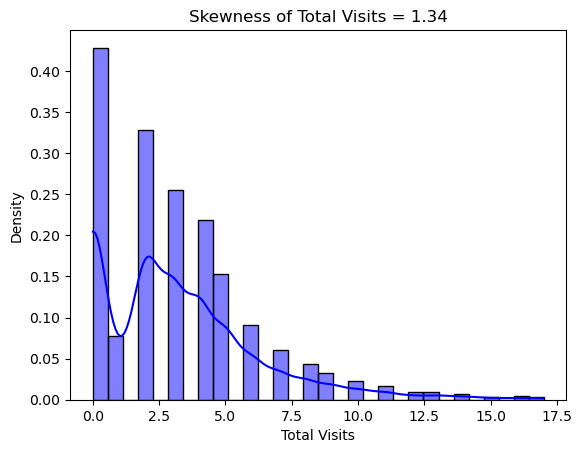

In [80]:
# Calculate skewness
skewness = skew(df_leads['TotalVisits'])
skewness_rounded = round(skewness, 2)

# Plotting the distribution
sns.histplot(df_leads['TotalVisits'], kde=True,  color='blue', stat="density", bins=30)
plt.title(f"Skewness of Total Visits = {skewness_rounded}")
plt.xlabel('Total Visits')
plt.ylabel('Density')
plt.show()

The distribution is heavily skewed to the left, will do Feature Eng to improve model performance

***Marketing Insight***<br>
"Total Visits" provides key insights into lead behavior, with a clear indication that leads visiting the website multiple times are more likely to convert. This information is valuable for marketing strategies aimed at increasing engagement and nurturing leads.



***Feature Eng.*** Variable Transformation (Log Transformation)

In [81]:
# Add a small constant (1) to avoid log(0)
df_leads['TotalVisits_Log'] = np.log(df_leads['TotalVisits'] + 1)

# Display the first few rows to confirm the transformation
print(df_leads[['TotalVisits', 'TotalVisits_Log']].head())

   TotalVisits  TotalVisits_Log
0          0.0         0.000000
1          5.0         1.791759
2          2.0         1.098612
3          1.0         0.693147
4          2.0         1.098612


c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


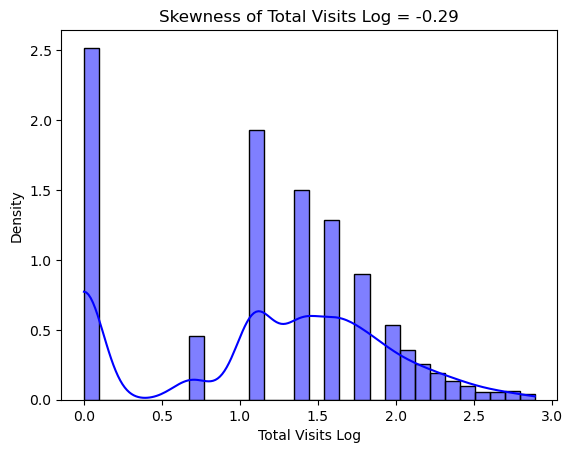

In [82]:
# Calculate skewness
skewness = skew(df_leads['TotalVisits_Log'])
skewness_rounded = round(skewness, 2)

# Plotting the distribution
sns.histplot(df_leads['TotalVisits_Log'], kde=True,  color='blue', stat="density", bins=30)
plt.title(f"Skewness of Total Visits Log = {skewness_rounded}")
plt.xlabel('Total Visits Log')
plt.ylabel('Density')
plt.show()

skewness dropped from 1.34 to -0.29, indicating it is nearly symmetric, making it easier for the model (specially linear and logistic models)

Created a new column "TotalVisits_Log" to represent the new data, will drop "TotalVisits" original column as we will use the transformed one.

In [83]:
# Drop a TotalVisits to reduce redundancy
df_leads = df_leads.drop('TotalVisits', axis=1)

The different visit patterns between converted and non-converted leads suggest that "Total Visits" is an important feature for predicting lead conversion likelihood and will make it easier after the log transfomation for the models.

*7 -> Total Visits_log - Keep*


In [84]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9019 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9019 non-null   object 
 1   Lead Source                                    9019 non-null   object 
 2   Do Not Email                                   9019 non-null   int64  
 3   Do Not Call                                    9019 non-null   int64  
 4   Converted                                      9019 non-null   int64  
 5   Total Time Spent on Website                    9019 non-null   int64  
 6   Page Views Per Visit                           9019 non-null   float64
 7   Last Activity                                  9019 non-null   object 
 8   Country                                        6695 non-null   object 
 9   Specialization                                 5726 non-n

##### 8 - Total Time Spent on Website

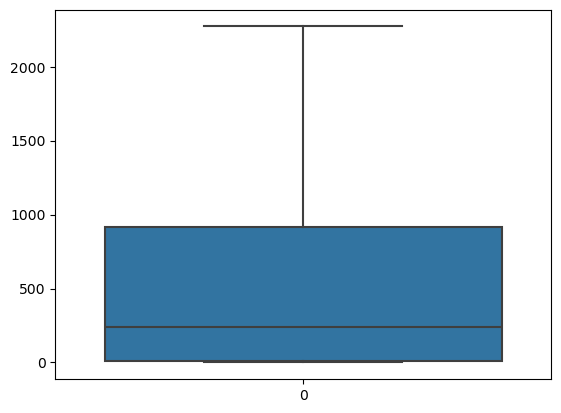

In [85]:

#visualizing boxplot 

sns.boxplot(df_leads['Total Time Spent on Website'])
plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


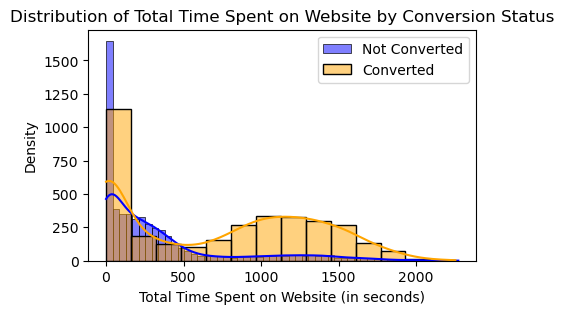

In [86]:
# Plotting the distribution of "Total Time Spent on Website" split by Converted and Not Converted
plt.figure(figsize=(5,3))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]['Total Time Spent on Website'], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]['Total Time Spent on Website'], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of Total Time Spent on Website by Conversion Status')
plt.xlabel('Total Time Spent on Website (in seconds)')
plt.ylabel('Density')
plt.legend()

plt.show()

***Feat Eng.*** Binning will reduce skewness and also capture a simplified representation of the feature for the model to learn better.<br>
Created a new column name Time_Spent_Binned, will drop original column

In [87]:
# Define the bin edges and labels
bin_edges = [0, 500, 1500, df_leads['Total Time Spent on Website'].max()]
bin_labels = ['Low', 'Medium', 'High']

# Create a new column with the binned values
df_leads['Time_Spent_Binned'] = pd.cut(df_leads['Total Time Spent on Website'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the value counts for each bin
print(df_leads['Time_Spent_Binned'].value_counts())

# Decide whether to drop the original column
# Uncomment the line below to drop it
df_leads.drop('Total Time Spent on Website', axis=1, inplace=True)

# Display the DataFrame after decision
print("\nDataFrame after decision:")
df_leads.info()

Time_Spent_Binned
Low       5980
Medium    2475
High       564
Name: count, dtype: int64

DataFrame after decision:
<class 'pandas.core.frame.DataFrame'>
Index: 9019 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9019 non-null   object  
 1   Lead Source                                    9019 non-null   object  
 2   Do Not Email                                   9019 non-null   int64   
 3   Do Not Call                                    9019 non-null   int64   
 4   Converted                                      9019 non-null   int64   
 5   Page Views Per Visit                           9019 non-null   float64 
 6   Last Activity                                  9019 non-null   object  
 7   Country                                        6695 non-null   object  
 8   Special

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


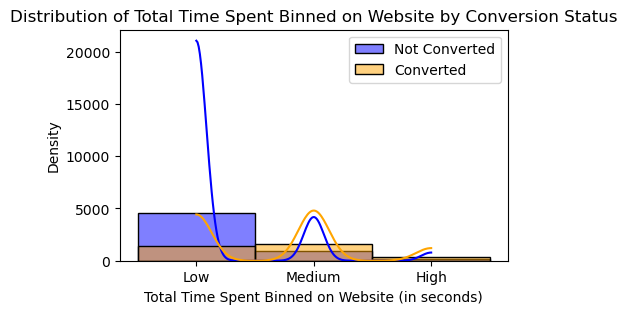

In [88]:
# Plotting the distribution of "Total Time Spent on Website" split by Converted and Not Converted
plt.figure(figsize=(5,3))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]['Time_Spent_Binned'], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]['Time_Spent_Binned'], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of Total Time Spent Binned on Website by Conversion Status')
plt.xlabel('Total Time Spent Binned on Website (in seconds)')
plt.ylabel('Density')
plt.legend()

plt.show()

***Marketing Insight***<br>
longer time spent on the website correlates to higher conversion rates. This insight can help marketing teams focus on strategies that increase user engagement and time spent on the website.<br>

The "Total Time Spent on Website" feature shows a clear distinction between converted and non-converted leads, with higher time spent associated with a greater likelihood of conversion, making it valuable for predicting lead behavior.

8 ->32  Time_Spent_Binned - Keep

##### 9 - Page Views Per Visit

In [89]:
#checking for mode value
df_leads['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1792
3.00    1193
4.00     893
1.00     651
        ... 
1.31       1
2.13       1
2.14       1
1.63       1
1.17       1
Name: count, Length: 73, dtype: int64

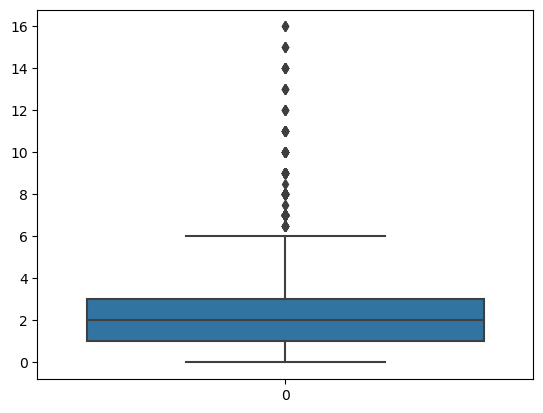

In [90]:
#visualizing boxplot 
sns.boxplot(df_leads['Page Views Per Visit'])
plt.show()

Although the boxplot displays several "outliers," the values are closely clustered and may not significantly impact the analysis

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


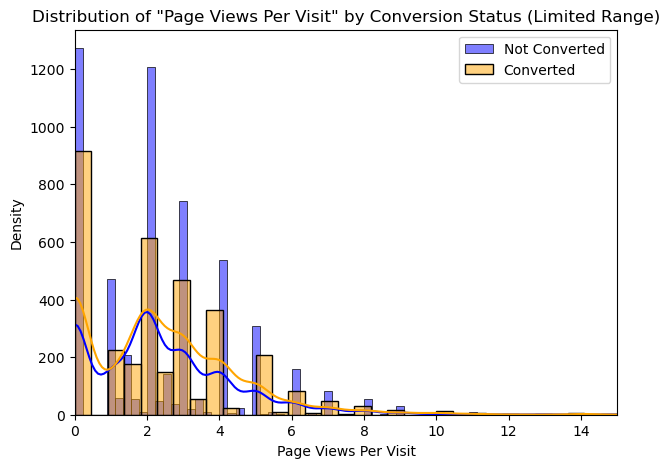

In [91]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(7, 5))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]["Page Views Per Visit"], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]["Page Views Per Visit"], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of "Page Views Per Visit" by Conversion Status (Limited Range)')
plt.xlabel("Page Views Per Visit")
plt.ylabel('Density')
plt.xlim(0, 15)  # Limiting the x-axis to 0-15 for better visualization
plt.legend()

plt.show()

***Feature Eng.*** - Binning the column is heavily right-skewed, with most of the values falling between 0 and 4. Low (0-2),  Medium (2-4), High (4+).  Binning will simplify the distribution and help capture the trends between page views and conversion. <br>
A new column Page_Views_Binned is created, need to drop original Page Views Per Visit

In [92]:
# Define bin edges and labels
bin_edges = [0, 2, 4, df_leads['Page Views Per Visit'].max()]
bin_labels = ['Low', 'Medium', 'High']

# Create a new column with binned values
df_leads['Page_Views_Binned'] = pd.cut(df_leads['Page Views Per Visit'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the value counts for each bin
print(df_leads['Page_Views_Binned'].value_counts())
# Drop 'Page Views Per Visit' to reduce redundancy
df_leads = df_leads.drop('Page Views Per Visit', axis=1)
#data check 
df_leads.info()

Page_Views_Binned
Low       5184
Medium    2656
High      1179
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9019 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9019 non-null   object  
 1   Lead Source                                    9019 non-null   object  
 2   Do Not Email                                   9019 non-null   int64   
 3   Do Not Call                                    9019 non-null   int64   
 4   Converted                                      9019 non-null   int64   
 5   Last Activity                                  9019 non-null   object  
 6   Country                                        6695 non-null   object  
 7   Specialization                                 5726 non-null   object  
 8   What is your current occupation   

***Marketing Insight***<br>
The majority of leads fall into the "Low" engagement category, suggesting that increasing page views could lead to better conversion rates.

For modeling, the "Page Views Binned" feature captures different levels of engagement, making it a useful predictor for lead conversion likelihood.

*9 - Page_Views_Binned - Keep*

##### 10 - Last Activity

In [94]:
#Last Activity
df_leads['Last Activity'].value_counts(dropna=False)

Last Activity
email opened               3415
sms sent                   2722
Other Activities           1311
olark chat conversation     970
page visited on website     601
Name: count, dtype: int64

***Feature Engineering: Category Aggregation*** remove less frequent categories

In [95]:
# Define a cutoff value for low-frequency activities
cutoff_value = 500

# Identify activities to be grouped into "Other Activities"
activities_to_replace = df_leads['Last Activity'].value_counts()[df_leads['Last Activity'].value_counts() < cutoff_value].index.tolist()

# Replace less frequent activities with "Other Activities" using .loc
df_leads.loc[df_leads['Last Activity'].isin(activities_to_replace), 'Last Activity'] = 'Other Activities'

# Check the updated value counts
print(df_leads['Last Activity'].value_counts())

Last Activity
email opened               3415
sms sent                   2722
Other Activities           1311
olark chat conversation     970
page visited on website     601
Name: count, dtype: int64


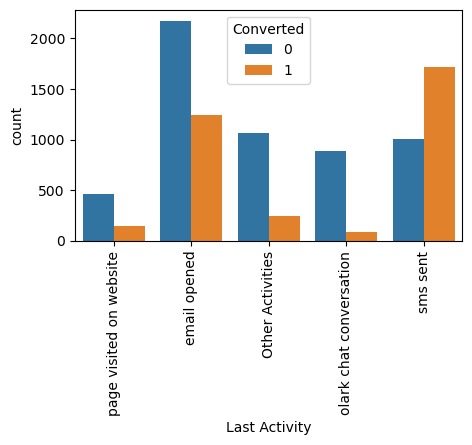

In [98]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

SMS Sent is a strong indicator of conversion, while activities like "Email Opened" and "Olark Chat Conversation" are associated with a higher likelihood of non-conversion, making "Last Activity" an important feature for the model.

***Marketing Insight***<br>
SMS is an effective conversion driver, meaning that marketing strategies should focus on using SMS as a follow-up method, whereas chat and email interactions may require additional actions to improve conversion rates.

*10 - Last Activity - Keep*

##### 11 - Country

In [99]:
# Count NaN values in the 'Country' column
missing_lead_source = df_leads['Country'].isna().sum()
print(f'Missing values in "Country" column: {missing_lead_source}')

Missing values in "Country" column: 2324


In [100]:
#checking for values
df_leads['Country'].value_counts()

Country
india                   6411
united states             68
united arab emirates      52
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
france                     6
oman                       6
germany                    4
unknown                    4
south africa               4
nigeria                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malays

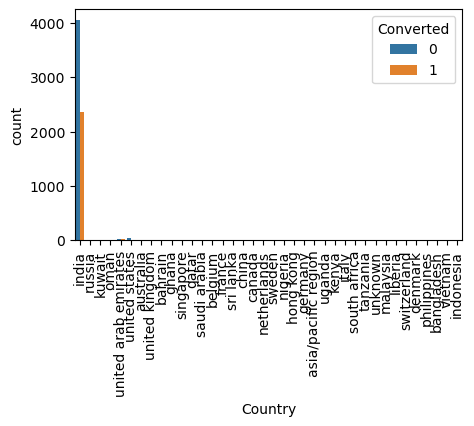

In [101]:
#plotting spread of Country columnn 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Country', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Feature Country is highly skewed, before discarting it, will analyze the correlation with the target variable (converted), If there's a strong correlation, it may be worth keeping and doing a Feature Eng.

In [102]:
country_conversion = df_leads.groupby('Country')['Converted'].mean().to_dict()
df_leads['Country_Encoded'] = df_leads['Country'].map(country_conversion)

#Calculate the correlation between the encoded 'Country' and 'Converted'
correlation = df_leads[['Country_Encoded', 'Converted']].corr().iloc[0, 1]
print(f'Correlation between Country and Converted: {correlation:.4f}')

Correlation between Country and Converted: 0.0769


The correlation coefficient of 0.08 indicates a very weak positive correlation, suggests that there is little to no linear relationship between the Country feature and the Converted variable, hence this column will be dropped

*11 - Country - Dropped*

In [103]:
#dropping Marketing Engagement columns 
df_leads.drop(["Country", "Country_Encoded"], axis=1, inplace = True)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9019 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9019 non-null   object  
 1   Lead Source                                    9019 non-null   object  
 2   Do Not Email                                   9019 non-null   int64   
 3   Do Not Call                                    9019 non-null   int64   
 4   Converted                                      9019 non-null   int64   
 5   Last Activity                                  9019 non-null   object  
 6   Specialization                                 5726 non-null   object  
 7   What is your current occupation                6354 non-null   object  
 8   What matters most to you in choosing a course  6336 non-null   object  
 9   Search                                        

##### 12 - Specialization

In [104]:
# Calculate the percentage of null values in the "Specialization" column
null_percentage = df_leads['Specialization'].isnull().mean() * 100

# Print the percentage of null values
print(f"Percentage of null values in 'Specialization': {null_percentage:.2f}%")

Percentage of null values in 'Specialization': 36.51%


In [105]:
#describe specialization
df_leads.Specialization.describe()

count                   5726
unique                    18
top       finance management
freq                     954
Name: Specialization, dtype: object

***EDA/Feature Eng.*** - Consider imputing the categorical NaN's with mode, but in this case as there is a  high percentage of missing values, imputing with "Not Specified" is preferred, to keep the distinction between known and unknown without artificially inflating a specific category.

In [106]:
# Imputing NaN values with "Not Specified"
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Not Specified')

In [107]:
#checking for values
df_leads['Specialization'].value_counts()

Specialization
Not Specified                        3293
finance management                    954
human resource management             825
marketing management                  819
operations management                 498
business administration               393
it projects management                363
supply chain management               343
banking, investment and insurance     327
media and advertising                 199
travel and tourism                    197
international business                174
healthcare management                 152
e-commerce                            110
hospitality management                109
retail management                      97
rural and agribusiness                 70
e-business                             56
services excellence                    40
Name: count, dtype: int64

***Feature Engineering: Category Aggregation*** Management Specializations to reduce the coplexity of the feature to make it more manageable and potentially improve how a model learns from it

In [110]:
#bining Management Specializations 

df_leads['Specialization'] = np.where(df_leads['Specialization'].isin(['finance management', 'human resource management',
                                                                       'marketing management', 'operations management',
                                                                       'it projects management', 'supply chain management',
                                                                       'healthcare Management', 'hospitality management',
                                                                       'retail management']),
                                       'Management_Specializations', df_leads['Specialization'])

In [113]:
# specializations
df_leads.Specialization.value_counts()

Specialization
Management_Specializations           4008
Not Specified                        3293
business administration               393
banking, investment and insurance     327
media and advertising                 199
travel and tourism                    197
international business                174
healthcare management                 152
e-commerce                            110
rural and agribusiness                 70
e-business                             56
services excellence                    40
Name: count, dtype: int64

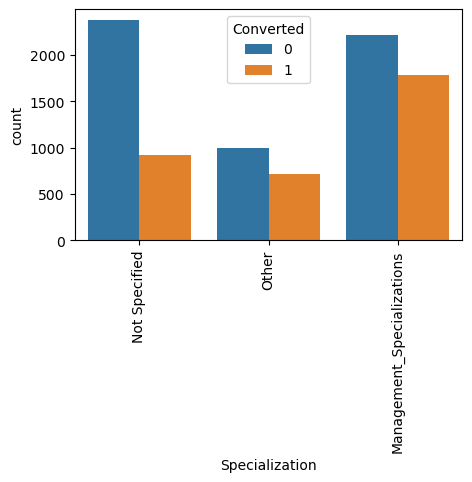

In [273]:
#plotting spread of Specialization columnn 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()



***Feature Engineering: Category Aggregation*** Identified there are several small categories with similar conversion rate, so will merge them to "Other" category

In [114]:
# Define a cutoff value
cutoff_value = 500

# Create a list of Specialization to be replaced with 'Other'
specialization_to_replace = df_leads['Specialization'].value_counts()[df_leads['Specialization'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent Specialization with 'Other'
df_leads['Specialization'] = df_leads['Specialization'].apply(lambda x: 'Other' if x in specialization_to_replace else x)

# Check the updated value counts
print(df_leads['Specialization'].value_counts())

Specialization
Management_Specializations    4008
Not Specified                 3293
Other                         1718
Name: count, dtype: int64


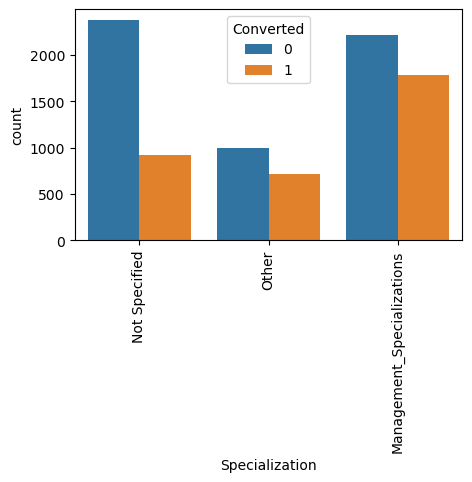

In [274]:
#plotting the spred of new Specialization columnn 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()


***Marketing Insight*** Management-related specializations have the highest conversion rates, indicating these leads are more likely to convert, making them a key target for marketing strategies.

This feature shows that leads with management-related specializations are more likely to convert, making it a strong predictor for the model.

*12 - Specialization - Keep*

##### 13 - How did you hear about X Education

Deleted with 55% cut-off </br>
*13 - How did you hear about X Educuation - Dropped*

##### 14 - What is your current occupation

In [116]:
#What is your current occupation
df_leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
unemployed              5446
NaN                     2665
working professional     672
student                  206
other                     13
housewife                  9
businessman                8
Name: count, dtype: int64

***Feature Engineering: Imputing*** NaN values with "Other" to differentiate missing data from existing categories and avoid introducing bias by adding too many "unemployed" instances.

In [117]:
# Imputing NaN values with "Other"
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'other')

In [118]:
#What is your current occupation
df_leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
unemployed              5446
other                   2678
working professional     672
student                  206
housewife                  9
businessman                8
Name: count, dtype: int64

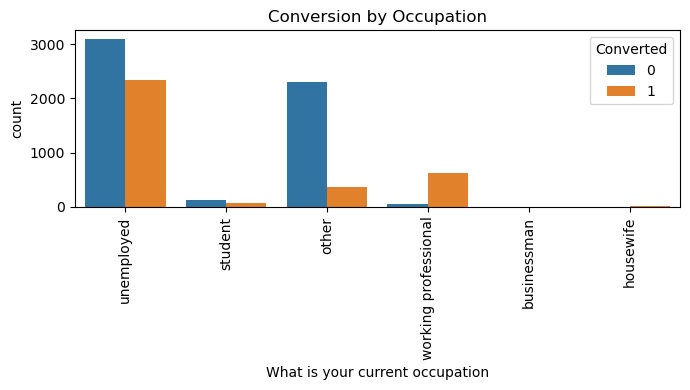

In [276]:
# Plotting the count plot
plt.figure(figsize=(7,4))
sns.countplot(x='What is your current occupation', hue='Converted', data=df_leads)
plt.title('Conversion by Occupation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

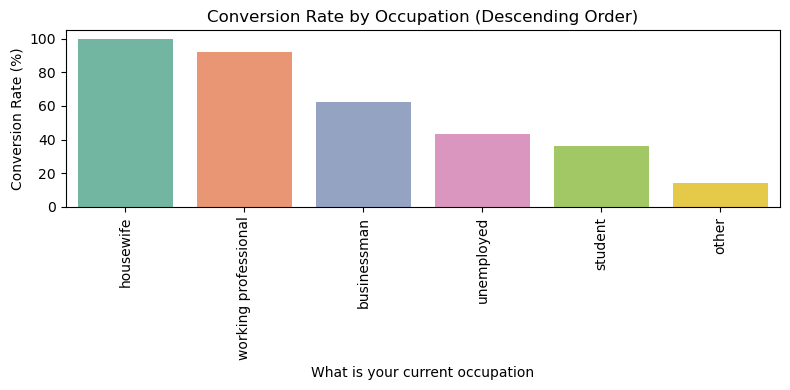

In [125]:
# Calculate the percentage of conversions for each occupation
conversion_rate = df_leads.groupby('What is your current occupation')['Converted'].mean() * 100

# Sort the conversion rate in descending order
conversion_rate_sorted = conversion_rate.sort_values(ascending=False)

# Plotting the conversion rate plot
plt.figure(figsize=(8,4))
sns.barplot(x=conversion_rate_sorted.index, y=conversion_rate_sorted.values, palette='Set2')
plt.title('Conversion Rate by Occupation (Descending Order)')
plt.xticks(rotation=90)
plt.ylabel('Conversion Rate (%)')
plt.tight_layout()
plt.show()

***Marketing Insight***
The Housewife and Working Professional groups are high-quality leads based on their high conversion rates, despite their smaller lead counts.
Unemployed leads are numerous but have a lower conversion rate, indicating that while they are many, their quality is more varied.

Because of the conversion rate so different, I will not group housewife, businessman or student into others, unless we need to make some more data cleanup for model optimization

*14 - What is your Current Occupation  - Keep*

##### 15 - What matters most to you in choosing a course

In [126]:
#checking value counts
df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
better career prospects      6334
NaN                          2683
flexibility & convenience       1
other                           1
Name: count, dtype: int64

***Feature Engineering: Imputing*** NaN values with mode

In [127]:
# Imputing NaN values with "better carreer prospects" (mode)
df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].replace(np.nan, 'better career prospects')

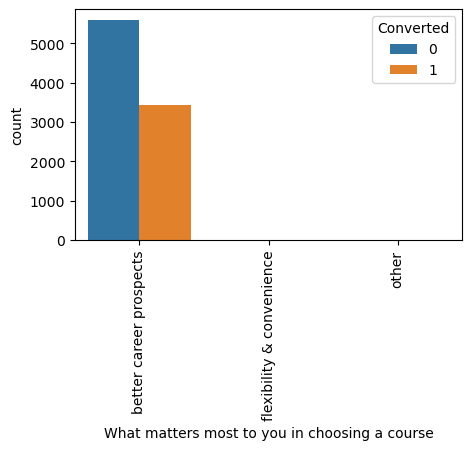

In [129]:
#plotting spread of What matters most to you in choosing a course columnn 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'What matters most to you in choosing a course', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

***Feature Engineering*** Given that the majority of responses fall under better career prospects category, will convert to binary viariable, making the feature easier fot the model to interpret </br>
"1" for "better career prospects" </br>
"0" for everything else 


In [130]:
# Convert the 'What matters most to you in choosing a course' feature into a binary variable
df_leads['What matters most to you in choosing a course'] = np.where(
    df_leads['What matters most to you in choosing a course'] == 'better career prospects', 1, 0
)

# Check the updated column
print(df_leads['What matters most to you in choosing a course'].value_counts())

What matters most to you in choosing a course
1    9017
0       2
Name: count, dtype: int64


***Marketing Insight***<br>
Better Career Prospects is a key driver for leads when selecting a course

*15 - What matters most to you in choosing a course - Keep*

##### 16 - Search </br> 

##### 17 - Magazine</br>

##### 18 - Newspaper Article

##### 19 - X Education Forums

##### 20 - Newspaper

##### 21 - Digital Advertisement

##### 22 - Through Recommendations

##### 23 - Receive More Updates About Our Courses

Will analyze these in a batch as they are all binary categories

In [131]:
df_leads.Search.value_counts(dropna=False)

Search
no     9006
yes      13
Name: count, dtype: int64

In [132]:
# Calculate the percentage of "no" in the "Search" column
no_percentage = (df_leads['Search'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Search': {no_percentage:.2f}%")

Percentage of 'no' in 'Search': 99.86%


In [133]:
df_leads.Magazine.value_counts(dropna=False)
# Calculate the percentage of "no" in the "Magazine" column
no_percentage = (df_leads['Magazine'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Magazine': {no_percentage:.2f}%")

Percentage of 'no' in 'Magazine': 100.00%


In [134]:
# Calculate the percentage of "no" in the "Newspaper Article" column
no_percentage = (df_leads['Newspaper Article'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Newspaper Article': {no_percentage:.2f}%")

Percentage of 'no' in 'Newspaper Article': 99.99%


In [135]:
# Calculate the percentage of "no" in the "X Education Forums" column
no_percentage = (df_leads['X Education Forums'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'X Education Forums': {no_percentage:.2f}%")

Percentage of 'no' in 'X Education Forums': 100.00%


In [136]:
# Calculate the percentage of "no" in the "Newspaper" column
no_percentage = (df_leads['Newspaper'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Newspaper': {no_percentage:.2f}%")

Percentage of 'no' in 'Newspaper': 99.99%


In [137]:
# Calculate the percentage of "no" in the "Digital Advertisement" column
no_percentage = (df_leads['Digital Advertisement'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Digital Advertisement': {no_percentage:.2f}%")

Percentage of 'no' in 'Digital Advertisement': 99.97%


In [138]:
# Calculate the percentage of "no" in the "Through Recommendations" column
no_percentage = (df_leads['Through Recommendations'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Through Recommendations': {no_percentage:.2f}%")

Percentage of 'no' in 'Through Recommendations': 99.93%


In [139]:
# Calculate the percentage of "no" in the "Receive More Updates About Our Courses" column
no_percentage = (df_leads['Receive More Updates About Our Courses'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Receive More Updates About Our Courses': {no_percentage:.2f}%")

Percentage of 'no' in 'Receive More Updates About Our Courses': 100.00%


Noticing an imbalance in each one, will try to combine into one column and see if they have a better output

In [140]:
# List of columns to combine
columns_to_combine = [
    'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
    'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
    'Receive More Updates About Our Courses'
]

# Create a new column "Marketing Engagement"
df_leads['Marketing Engagement'] = df_leads[columns_to_combine].apply(lambda x: 1 if (x == 'yes').any() else 0, axis=1)

# Drop the original columns, as they are combined into a new feature
df_leads = df_leads.drop(columns=columns_to_combine)

# Check the distribution of the new feature
print(df_leads['Marketing Engagement'].value_counts(normalize=True) * 100)

Marketing Engagement
0    99.756071
1     0.243929
Name: proportion, dtype: float64


Due to extreme imbalance in these colums (>99% of No's), they will be dropped. It likely won't provide useful information for the model to make accurate predictions, and may instead contribute to overfitting or add unnecessary complexity.

*16 Search - Dropped </br>
17 Magazine - Drpped </br>
18 Newspaper Article  - Dropped </br>
19 X Education Forums  - Dropped </br>
20 Newspaper  - Dropped </br>
21 Digital Advertisement  - Dropped </br>
22 Through Recommendations  - Dropped </br>
23 Receive More Updates About Our Courses - Dropped </br>*

In [141]:
#dropping Marketing Engagement columns 
df_leads.drop(["Marketing Engagement"], axis=1, inplace = True)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,...,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,TotalVisits_Log,Time_Spent_Binned,Page_Views_Binned
0,api,olark chat,0,0,0,page visited on website,Not Specified,unemployed,1,interested in other courses,...,02.medium,02.medium,15.0,15.0,no,no,modified,0.000000,Low,Low
1,api,organic search,0,0,0,email opened,Not Specified,unemployed,1,ringing,...,02.medium,02.medium,15.0,15.0,no,no,email opened,1.791759,Medium,Medium
2,landing page submission,direct traffic,0,0,1,email opened,Other,student,1,will revert after reading the email,...,02.medium,01.high,14.0,20.0,no,yes,email opened,1.098612,High,Low
3,landing page submission,direct traffic,0,0,0,Other Activities,Other,unemployed,1,ringing,...,02.medium,01.high,13.0,17.0,no,no,modified,0.693147,Low,Low
4,landing page submission,google,0,0,1,Other Activities,Not Specified,unemployed,1,will revert after reading the email,...,02.medium,01.high,15.0,18.0,no,no,modified,1.098612,Medium,Low


In [142]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9019 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9019 non-null   object  
 1   Lead Source                                    9019 non-null   object  
 2   Do Not Email                                   9019 non-null   int64   
 3   Do Not Call                                    9019 non-null   int64   
 4   Converted                                      9019 non-null   int64   
 5   Last Activity                                  9019 non-null   object  
 6   Specialization                                 9019 non-null   object  
 7   What is your current occupation                9019 non-null   object  
 8   What matters most to you in choosing a course  9019 non-null   int32   
 9   Tags                                          

##### 24 - Tags

In [144]:
#checking value counts of Tag variable
df_leads['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3308
will revert after reading the email                  2017
ringing                                              1173
interested in other courses                           506
already a student                                     464
closed by horizzon                                    292
switched off                                          239
busy                                                  185
lost to eins                                          171
not doing further education                           137
interested  in full time mba                          116
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch 

Because the NaN values are grater than the mode, cannot impute the NaN values with Mode, let's impute it with "Not Specified"

In [145]:
#replacing Nan values with "Tags"
df_leads['Tags'] = df_leads['Tags'].replace(np.nan,'Not Specified')

***Feat Engineering*** 

In [146]:
#  Define a cutoff value
cutoff_value = 100

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Tags'].value_counts()[df_leads['Tags'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Tags'] = df_leads['Tags'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Tags'].value_counts())

Tags
Not Specified                          3308
will revert after reading the email    2017
ringing                                1173
interested in other courses             506
already a student                       464
Other                                   300
closed by horizzon                      292
switched off                            239
busy                                    185
lost to eins                            171
not doing further education             137
interested  in full time mba            116
graduation in progress                  111
Name: count, dtype: int64


In [150]:
#binning  tags with low frequency 
df_leads['Tags'] = df_leads['Tags'].replace(['switched off', 'busy','lost to eins',
                                     'not doing further education','interested  in full time mba'], 'Not Interested/Low Engagement')

df_leads['Tags'] = df_leads['Tags'].replace(['already a student',
                                       'interested in other courses'] , 'Already Engaged/Irrelevant')
# Check the updated value counts
print(df_leads['Tags'].value_counts())

Tags
Not Specified                          3308
will revert after reading the email    2017
ringing                                1173
Already Engaged/Irrelevant              970
Not Interested/Low Engagement           848
Other                                   300
closed by horizzon                      292
graduation in progress                  111
Name: count, dtype: int64


***Marketing Insight***<br>
Tags such as "Will Revert After Reading the Email" highlight highly engaged leads, which can help focus marketing efforts on those more likely to convert.

The "Tags" feature captures important levels of lead engagement and intent, making it a valuable predictor for conversion, especially with key tags indicating high intent.

*24 - Tags - Keep*

25 - Lead Quality

In [151]:
#checking value counts of Tag variable
df_leads['Lead Quality'].value_counts(dropna=False)

Lead Quality
NaN                  4692
might be             1516
not sure             1075
worst                 597
high in relevance     589
low in relevance      550
Name: count, dtype: int64

NaN values will be reclassified as "not sure", because the NaN values are grater than the mode, cannot impute the NaN values with Mode

In [152]:
#replacing Nan values with "Lead Quality"
df_leads['Lead Quality'] = df_leads['Lead Quality'].replace(np.nan,'not sure')

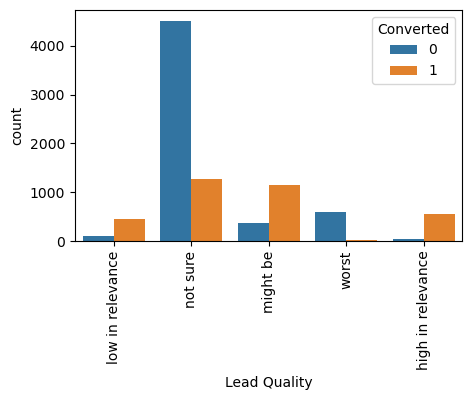

In [195]:
#plotting spread of Lead Quality columnn 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Lead Quality', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

For this feature, I adjusted the null value threshold from the initial 45% to 55% to keep the column, as it was considered to contain valuable information despite a high percentage of missing values. This column's output is based on both data analysis and intuition from the employee managing the lead ([Leads Data Dictionary](../Resources/Leads_Data_Dictionary.xlsx)). In the end, it turned out to be the right choice, as the feature provides valuable insights and proves to be highly informative.


***Marketing Insight***<br>
Leads marked as "High in Relevance" have a great chance of converting, so focusing efforts on these should be a top priority, while "Low in Relevance" also shows potential for conversion.

*25 - Lead Quality - Keep*

##### 26 - Update me on Supply Chain Content 

##### 27 - Get updates on DM Content

In [154]:
# Calculate the percentage of "no" in the "Update me on Supply Chain Content" column
no_percentage = (df_leads['Update me on Supply Chain Content'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Update me on Supply Chain Content': {no_percentage:.2f}%")

Percentage of 'no' in 'Update me on Supply Chain Content': 100.00%


In [155]:
# Calculate the percentage of "no" in the "Get updates on DM Content" column
no_percentage = (df_leads['Get updates on DM Content'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Get updates on DM Content': {no_percentage:.2f}%")

Percentage of 'no' in 'Get updates on DM Content': 100.00%


Due to extreme imbalance in this colum (100% of No's), it will be *dropped*. It likely it won't provide useful information for the model to make accurate predictions, and may instead contribute to overfitting or add unnecessary complexity.

*26 - Update me on Supply Chain Content - Dropped </br>*
*27 - Get updates on DM Content - Dropped*

In [156]:
#dropping Update me on Supply Chain Content column 
df_leads.drop(["Update me on Supply Chain Content", "Get updates on DM Content"], axis=1, inplace = True)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9019 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9019 non-null   object  
 1   Lead Source                                    9019 non-null   object  
 2   Do Not Email                                   9019 non-null   int64   
 3   Do Not Call                                    9019 non-null   int64   
 4   Converted                                      9019 non-null   int64   
 5   Last Activity                                  9019 non-null   object  
 6   Specialization                                 9019 non-null   object  
 7   What is your current occupation                9019 non-null   object  
 8   What matters most to you in choosing a course  9019 non-null   int32   
 9   Tags                                          

##### 28 - Lead Profile


Deleted with 55% cut-off, as this column had 74.19 null values </br>
*28 - Lead Profile  - Dropped*

##### 29 - City

In [157]:
#checking value counts of City variable
df_leads['City'].value_counts(dropna=False)

City
NaN                            3591
mumbai                         3135
thane & outskirts               731
other cities                    671
other cities of maharashtra     446
other metro cities              372
tier ii cities                   73
Name: count, dtype: int64

***EDA*** in this case, even that NaN is grater than the mode, let's impute with the mode Mumbai

In [158]:
df_leads['City'] = df_leads['City'].replace(np.nan,'mumbai')

***Feature Eng - binning***

In [159]:
# Grouping cities into broader categories based on region/size
df_leads['City'] = df_leads['City'].replace(['other metro cities','thane & outskirts'], 'other metro')

df_leads['City'] = df_leads['City'].replace(['other cities',
                                       'other cities of maharashtra', 'tier ii cities'] , 'non-metro')


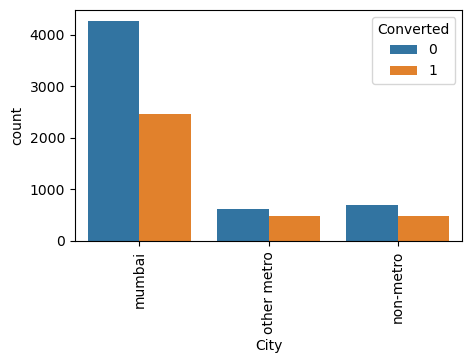

In [161]:
fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'City', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

***Marketing Insight***<br>
Mumbai leads the way in conversions, so focusing marketing efforts here could deliver the best results, while other cities show less promise.

For the model, "City" is an important feature since it helps capture geographic differences in lead conversions, especially with Mumbai being a key driver.

*29 - City - Keep*

##### 30 - Asymmetrique Activity Index</br>

##### 31 - Asymmetrique Profile Index

##### 32 - Asymmetrique Activity Score

##### 33 - Asymmetrique Profile Score

As per the ([Leads Data Dictionary](../Resources/Leads_Data_Dictionary.xlsx)) these columns are: An index and score assigned to each customer based on their activity and their profile. Asymmetrique Activity Index and Assimetric Profile Index are categorical, while Asymmetric Activity Score and Asymmetrique Profile Score are numerical
I'm interested in the corelation between these features and conversions, but need to consider that they have high null data (+45%)

In [162]:
#checking value counts of City variable
df_leads['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
NaN          4135
02.medium    3729
01.high       795
03.low        360
Name: count, dtype: int64

In [163]:
#replacing Nan values with "Asymmetrique Activity Index"
df_leads['Asymmetrique Activity Index'] = df_leads['Asymmetrique Activity Index'].replace(np.nan,'0. Unclassified')
#checking value counts of City variable
df_leads['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
0. Unclassified    4135
02.medium          3729
01.high             795
03.low              360
Name: count, dtype: int64

In [164]:
#checking value counts of City variable
df_leads['Asymmetrique Profile Index'].value_counts(dropna=False)

Asymmetrique Profile Index
NaN          4135
02.medium    2727
01.high      2127
03.low         30
Name: count, dtype: int64

In [165]:
#replacing Nan values with "Asymmetrique Profile Index"
df_leads['Asymmetrique Profile Index'] = df_leads['Asymmetrique Profile Index'].replace(np.nan,'0.Unclassified')
#checking value counts of City variable
df_leads['Asymmetrique Profile Index'].value_counts(dropna=False)

Asymmetrique Profile Index
0.Unclassified    4135
02.medium         2727
01.high           2127
03.low              30
Name: count, dtype: int64

In [167]:
# Binning "Asymmetrique Activity Index"
df_leads['Asymmetrique Activity Index'] = df_leads['Asymmetrique Activity Index'].replace({
    "01.high": 'high',
    "02.medium": 'medium',
    "03.low": 'low'
})

# Binning "Asymmetrique Profile Index"
df_leads['Asymmetrique Profile Index'] = df_leads['Asymmetrique Profile Index'].replace({
    "01.high": 'high',
    "02.medium": 'medium',
    "03.low": 'low'
})


In [168]:
#checking value counts of Asymmetrique Activity Score variable
df_leads['Asymmetrique Activity Score'].value_counts(dropna=False)

Asymmetrique Activity Score
NaN     4135
14.0    1702
15.0    1277
13.0     750
16.0     450
17.0     342
12.0     196
11.0      93
10.0      57
9.0        9
8.0        4
18.0       3
7.0        1
Name: count, dtype: int64

***EDA/Feature Engineering*** - As there ar a large amount of NaN values and we are dealing with a numerical feature, will impute with the Median is often preferred in cases with skewed distributions as it is less affected by outliers. 

In [169]:
# Using median imputation
median_value = df_leads['Asymmetrique Activity Score'].median()
df_leads['Asymmetrique Activity Score'] = df_leads['Asymmetrique Activity Score'].fillna(median_value)

#checking value counts of City variable
df_leads['Asymmetrique Activity Score'].value_counts(dropna=False)

Asymmetrique Activity Score
14.0    5837
15.0    1277
13.0     750
16.0     450
17.0     342
12.0     196
11.0      93
10.0      57
9.0        9
8.0        4
18.0       3
7.0        1
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Asymmetrique Activity Score'>

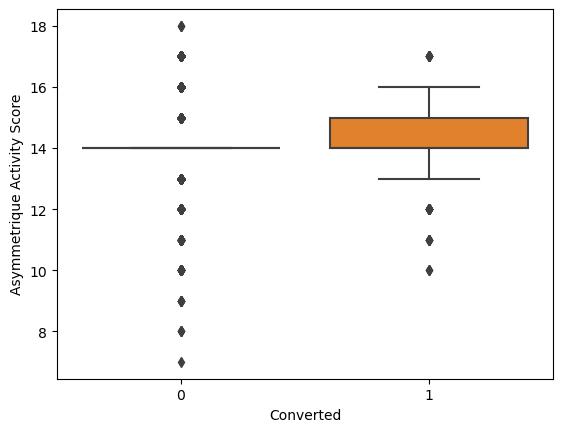

In [170]:
sns.boxplot(y = 'Asymmetrique Activity Score', x = 'Converted', data = df_leads)

---
---
***Tested several techniques for EDA/ Feat Eng. but couldn't make them work, they are between these double lines***

***EDA*** - manage outliers

In [171]:
df_leads_capping = df_leads.copy()

Q1 = df_leads_capping['Asymmetrique Activity Score'].quantile(0.25)
Q3 = df_leads_capping['Asymmetrique Activity Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
df_leads_capping['Asymmetrique Activity Score'] = df_leads_capping['Asymmetrique Activity Score'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

Lower Bound: 14.0, Upper Bound: 14.0


<Axes: xlabel='Converted', ylabel='Asymmetrique Activity Score'>

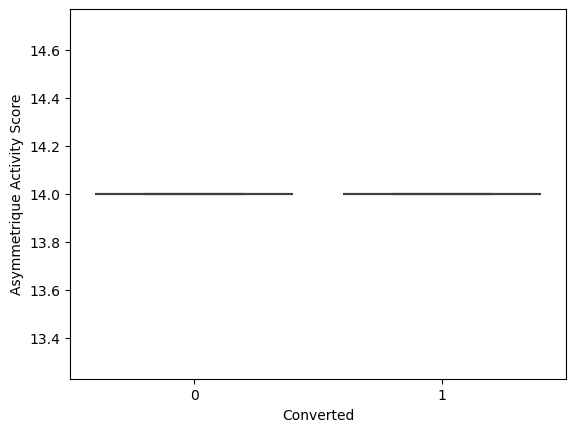

In [172]:
sns.boxplot(y = 'Asymmetrique Activity Score', x = 'Converted', data = df_leads_capping)

In this case capping  outliers did not work. Since many values were replaced with the upper bound, this led to a loss of distinctiveness between the groups.

Need to try another ***feature Eng.*** 

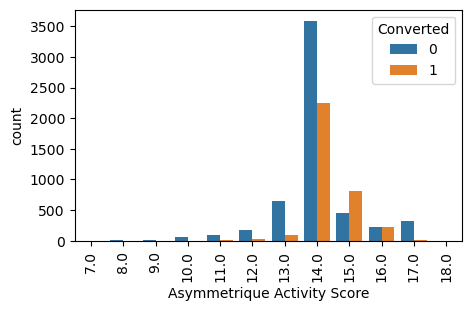

In [173]:
fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Asymmetrique Activity Score', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

log transformation can be an effective alternative method for handling outliers, especially for skewed distributions like the one in your Asymmetrique Activity Score

***Feat Eng. Log Transformation***

   Asymmetrique Activity Score  Log_Activity_Score
0                          NaN            0.000000
1                         14.0            2.708050
2                         15.0            2.772589
3                         13.0            2.639057
4                         16.0            2.833213
5                         12.5            2.602690
6                         17.0            2.890372
7                         18.0            2.944439


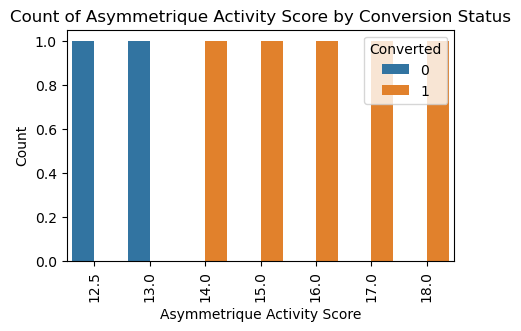

In [277]:
df_leads_log = df_leads.copy()

# Sample DataFrame
df_leads_log = pd.DataFrame({
    'Asymmetrique Activity Score': [None, 14.0, 15.0, 13.0, 16.0, 12.5, 17.0, 18.0],
    'Converted': [0, 1, 1, 0, 1, 0, 1, 1]  # Example conversion status
})

# Apply log transformation (adding 1 to avoid log(0))
df_leads_log['Log_Activity_Score'] = np.log1p(df_leads_log['Asymmetrique Activity Score'].fillna(0))
print(df_leads_log[['Asymmetrique Activity Score', 'Log_Activity_Score']])

# Plotting
plt.figure(figsize=(5,3))
sns.countplot(x='Asymmetrique Activity Score', hue='Converted', data=df_leads_log)
plt.xticks(rotation=90)
plt.title('Count of Asymmetrique Activity Score by Conversion Status')
plt.xlabel('Asymmetrique Activity Score')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')
plt.show()

This is not telling me much, as for some reason the log transformation converted all the "Converted" to two values only, not making much sense.

***In this case and because the distribution is not as spread out (in the original feature), we will not use any Feature Engineering for this column***

---
---

In [176]:
#checking value counts of Asymmetrique Profile Score variable
df_leads['Asymmetrique Profile Score'].value_counts(dropna=False)

Asymmetrique Profile Score
NaN     4135
15.0    1728
18.0    1052
16.0     587
17.0     562
20.0     291
19.0     222
14.0     216
13.0     196
12.0      22
11.0       8
Name: count, dtype: int64

*EDA/Feat. Eng.* - As there ar a large amount of NaN values and we are dealing with a numerical feature, will impute with the Median is often preferred in cases with skewed distributions as it is less affected by outliers. 

In [177]:
# Using median imputation
median_value = df_leads['Asymmetrique Profile Score'].median()
df_leads['Asymmetrique Profile Score'] = df_leads['Asymmetrique Profile Score'].fillna(median_value)

#checking value counts of City variable
df_leads['Asymmetrique Profile Score'].value_counts(dropna=False)

Asymmetrique Profile Score
16.0    4722
15.0    1728
18.0    1052
17.0     562
20.0     291
19.0     222
14.0     216
13.0     196
12.0      22
11.0       8
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Asymmetrique Profile Score'>

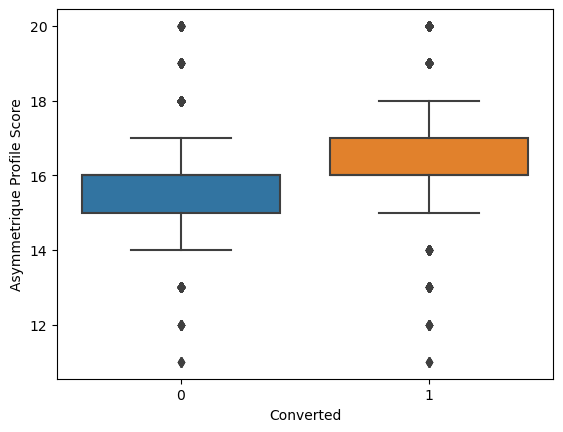

In [178]:
sns.boxplot(y = 'Asymmetrique Profile Score', x = 'Converted', data = df_leads)

***EDA*** manage outliers by capping

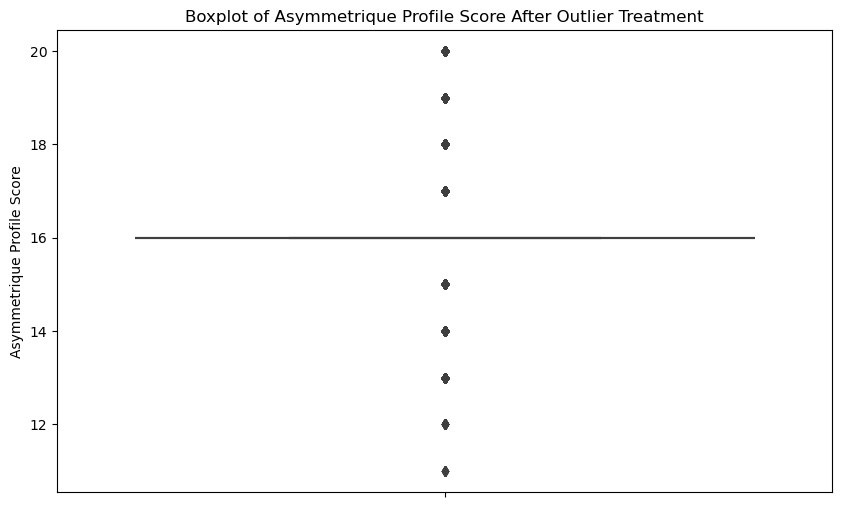

In [179]:
df_leads_APS = df_leads.copy()

# Calculate the 95th and 5th percentiles
Q3 = df_leads_APS['Asymmetrique Profile Score'].quantile(0.95)
Q1 = df_leads_APS['Asymmetrique Profile Score'].quantile(0.05)

# Remove outliers by filtering the DataFrame
df_leads_APS = df_leads_APS[(df_leads_APS['Asymmetrique Profile Score'] <= Q3) & (df_leads_APS['Asymmetrique Profile Score'] >= Q1)]

# Plotting the boxplot after outlier treatment
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_leads['Asymmetrique Profile Score'])
plt.title('Boxplot of Asymmetrique Profile Score After Outlier Treatment')
plt.show()

Capping didn't worked for this feature either, will keep them as is
<br>
<br>
Visualizing the 4 Features

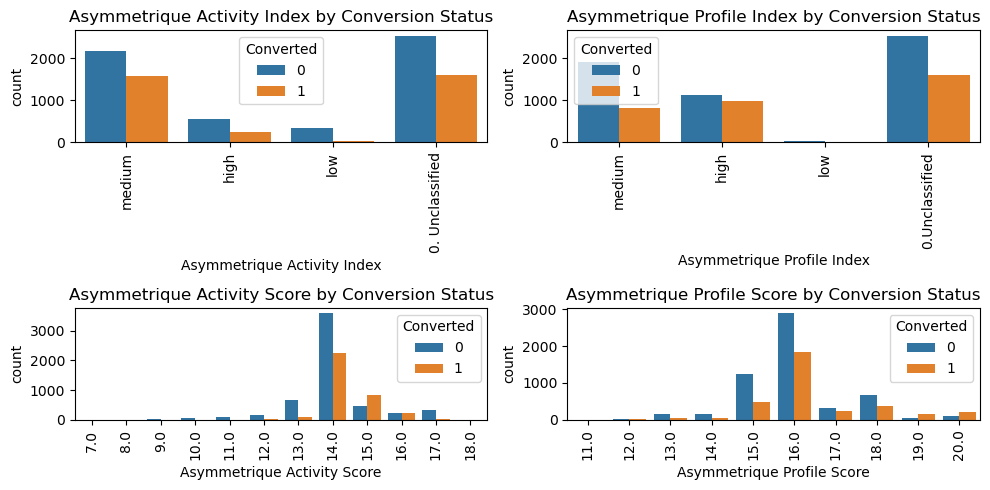

In [278]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(10,5))  # Adjust the figure size to accommodate 4 subplots

# Plotting 'Asymmetrique Activity Index' with 'Converted' as hue
ax1 = plt.subplot(2, 2, 1)
sns.countplot(x='Asymmetrique Activity Index', hue='Converted', data=df_leads, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title("Asymmetrique Activity Index by Conversion Status")

# Plotting 'Asymmetrique Profile Index' with 'Converted' as hue
ax2 = plt.subplot(2, 2, 2)
sns.countplot(x='Asymmetrique Profile Index', hue='Converted', data=df_leads, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("Asymmetrique Profile Index by Conversion Status")

# Plotting 'Asymmetrique Activity Score' with 'Converted' as hue
ax3 = plt.subplot(2, 2, 3)
sns.countplot(x='Asymmetrique Activity Score', hue='Converted', data=df_leads, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_title("Asymmetrique Activity Score by Conversion Status")

# Plotting 'Asymmetrique Profile Score' with 'Converted' as hue
ax4 = plt.subplot(2, 2, 4)
sns.countplot(x='Asymmetrique Profile Score', hue='Converted', data=df_leads, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
ax4.set_title("Asymmetrique Profile Score by Conversion Status")

plt.tight_layout()  # Adjust the spacing between subplots for better visual clarity
plt.show()

Candidates to revisit if we need to optimize model

*30 - Asymmetrique Activity Index - Keep  </br>
31 - Asymmetrique Profile Index - Keep </br>
32 - Asymmetrique Activity Score - Keep </br>
33 - Asymmetrique Profile Score - Keep* </br>


##### 34 - I agree to pay the amount through cheque

In [182]:
# Calculate the percentage of "no" in the "I agree to pay the amount through cheque" column
no_percentage = (df_leads['I agree to pay the amount through cheque'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'I agree to pay the amount through cheque': {no_percentage:.2f}%")

Percentage of 'no' in 'I agree to pay the amount through cheque': 100.00%


Due to extreme imbalance in this colum (100% of No's), it will be dropped. It likely it won't provide useful information for the model to make accurate predictions, and may instead contribute to overfitting or add unnecessary complexity.

*34 - I agree to pay the amount through cheque - Dropped*

In [183]:
#dropping Update me on Supply Chain Content column 
df_leads.drop(["I agree to pay the amount through cheque"], axis=1, inplace = True)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9019 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9019 non-null   object  
 1   Lead Source                                    9019 non-null   object  
 2   Do Not Email                                   9019 non-null   int64   
 3   Do Not Call                                    9019 non-null   int64   
 4   Converted                                      9019 non-null   int64   
 5   Last Activity                                  9019 non-null   object  
 6   Specialization                                 9019 non-null   object  
 7   What is your current occupation                9019 non-null   object  
 8   What matters most to you in choosing a course  9019 non-null   int32   
 9   Tags                                          

##### 35 - A free copy of Mastering The Interview

In [184]:
# Calculate the percentage of "no" in the "A free copy of Mastering The Interview" column
no_percentage = (df_leads['A free copy of Mastering The Interview'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'A free copy of Mastering The Interview': {no_percentage:.2f}%")

Percentage of 'no' in 'A free copy of Mastering The Interview': 68.54%


In [185]:
#checking total rows and cols in dataset
df_leads.shape

(9019, 21)

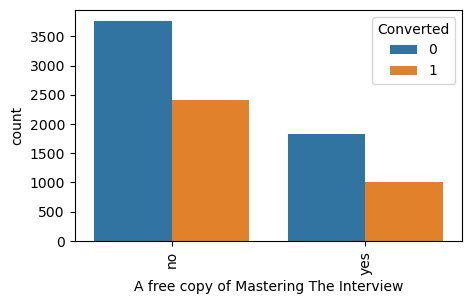

In [187]:
fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Feature Engineering checking for correlation to Converted 

In [188]:
# Convert 'yes' to 1 and 'no' to 0 for correlation calculation
df_leads['Free_Copy_Binary'] = df_leads['A free copy of Mastering The Interview'].replace({'yes': 1, 'no': 0})

# Check correlation between the binary version of the feature and the target variable
corr = df_leads['Free_Copy_Binary'].corr(df_leads['Converted'])
print(f"Correlation with Converted: {corr}")

Correlation with Converted: -0.03363453535305758


C:\Users\Colli\AppData\Local\Temp\ipykernel_9192\3352085433.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_leads['Free_Copy_Binary'] = df_leads['A free copy of Mastering The Interview'].replace({'yes': 1, 'no': 0})


Due to the low correlation (-0.03) and the following considerations </br>
- there is not a strong resson to believe that this feature will affect the desicion of conversion</br>
- There is no interaction of this feature that contibutes with other features. (need to validate with tree-base method)

*35 - A free copy of Mastering The Interview - Drop*

In [189]:
#dropping A free copy of Mastering The Interview column 
df_leads.drop(["A free copy of Mastering The Interview",'Free_Copy_Binary'], axis=1, inplace = True)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9019 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9019 non-null   object  
 1   Lead Source                                    9019 non-null   object  
 2   Do Not Email                                   9019 non-null   int64   
 3   Do Not Call                                    9019 non-null   int64   
 4   Converted                                      9019 non-null   int64   
 5   Last Activity                                  9019 non-null   object  
 6   Specialization                                 9019 non-null   object  
 7   What is your current occupation                9019 non-null   object  
 8   What matters most to you in choosing a course  9019 non-null   int32   
 9   Tags                                          

##### 36 - Last Notable Activity

In [190]:
#checking value counts of last Notable Activity
df_leads['Last Notable Activity'].value_counts()

Last Notable Activity
modified                        3253
email opened                    2807
sms sent                        2159
page visited on website          288
olark chat conversation          182
email link clicked               172
email bounced                     59
unsubscribed                      47
unreachable                       32
had a phone conversation          13
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: count, dtype: int64

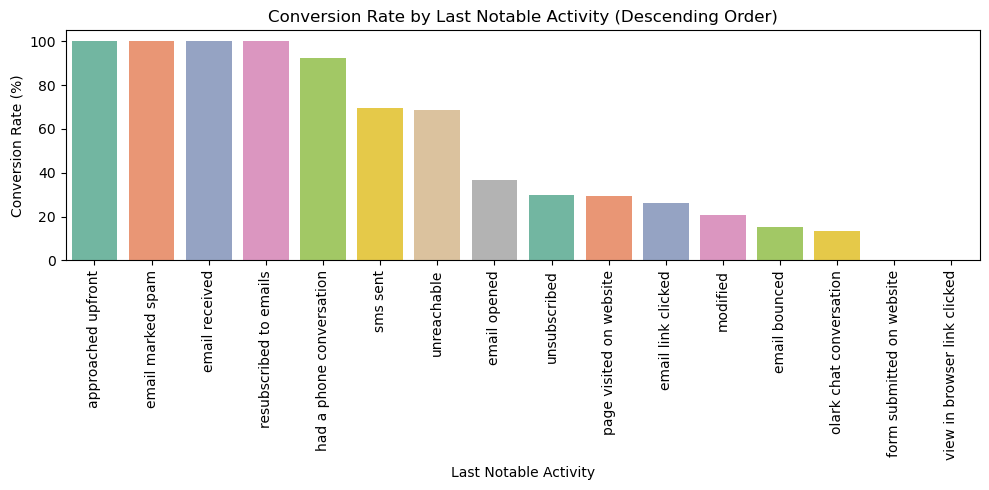

In [191]:
# Calculate the percentage of conversions for each occupation
conversion_rate = df_leads.groupby('Last Notable Activity')['Converted'].mean() * 100

# Sort the conversion rate in descending order
conversion_rate_sorted = conversion_rate.sort_values(ascending=False)

# Plotting the conversion rate plot
plt.figure(figsize=(10, 5))
sns.barplot(x=conversion_rate_sorted.index, y=conversion_rate_sorted.values, palette='Set2')
plt.title('Conversion Rate by Last Notable Activity (Descending Order)')
plt.xticks(rotation=90)
plt.ylabel('Conversion Rate (%)')
plt.tight_layout()
plt.show()


***Marketing insight*** direct contact although it's low numbers, seems to have a high conversion rate<br>

*Feat Eng. Binning* 

In [192]:
# Define a cutoff value
cutoff_value = 300

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Last Notable Activity'].value_counts()[df_leads['Last Notable Activity'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Last Notable Activity'].value_counts())

Last Notable Activity
modified        3253
email opened    2807
sms sent        2159
Other            800
Name: count, dtype: int64


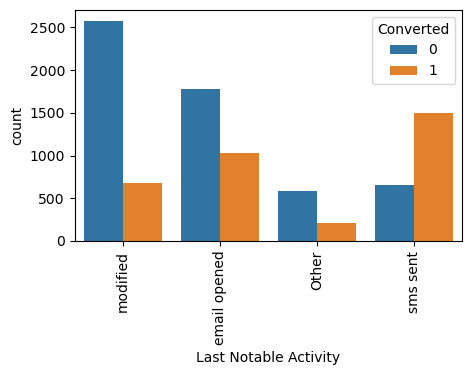

In [194]:
#plotting spread of  Last Notable Activity columnn 

fig, axs = plt.subplots(figsize = (5,3))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

*36 - Last Notable Activity - Keep*

##### Correlation Heatmap of Numerical Features

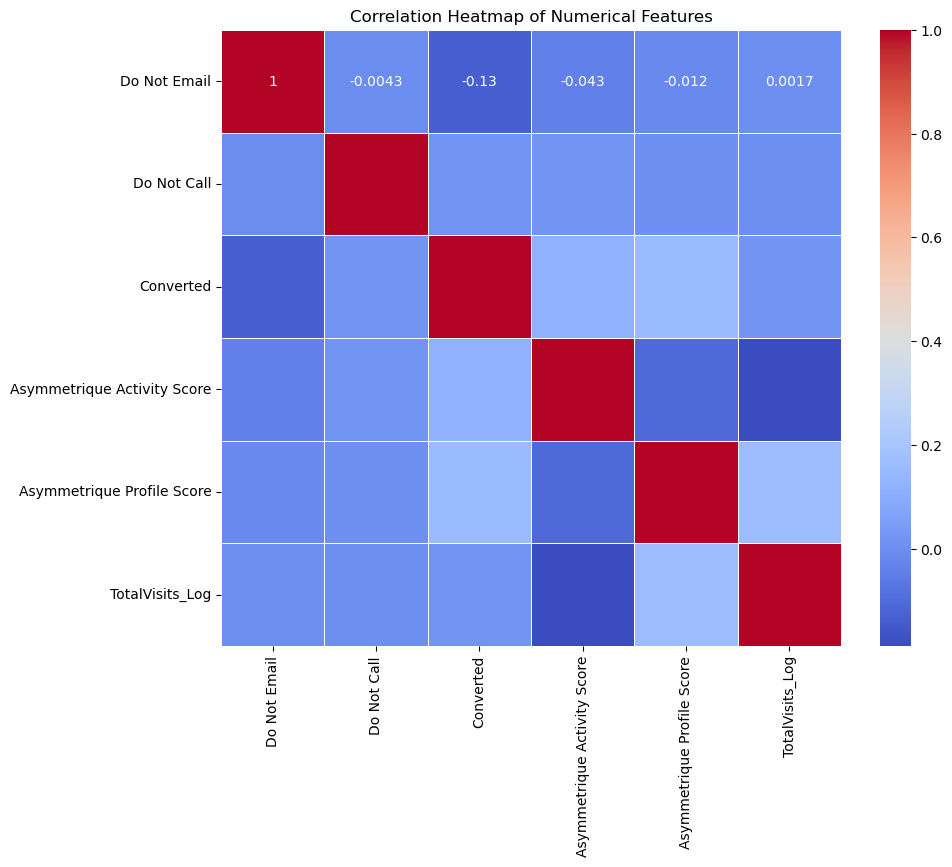

In [200]:
# Selecting only the numerical columns
numerical_df = df_leads.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Considering the correlation heatmap, none of the features are highly correlated, which means there are no concerns about multicollinearity for linear or logistic regression models. Therefore, ***no additional Feature Engineering*** is needed at this stage.

*End of Exploratory Data Analysis EDA Section* <br>
[Back to Top](#table-of-contents)

---

#### Clean Data Frame
Data inspection on "clean" dataframe

In [201]:
# Make a copy of the DataFrame
df_leads_eda = df_leads.copy()

In [202]:
#checking total rows and cols in dataset
df_leads_eda.shape

(9019, 20)

In [203]:
#data check
df_leads_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9019 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9019 non-null   object  
 1   Lead Source                                    9019 non-null   object  
 2   Do Not Email                                   9019 non-null   int64   
 3   Do Not Call                                    9019 non-null   int64   
 4   Converted                                      9019 non-null   int64   
 5   Last Activity                                  9019 non-null   object  
 6   Specialization                                 9019 non-null   object  
 7   What is your current occupation                9019 non-null   object  
 8   What matters most to you in choosing a course  9019 non-null   int32   
 9   Tags                                          

In [204]:
total_missing = df_leads_eda.isna().sum().sum()
print(f'Total missing values: {total_missing}')

Total missing values: 0


In [205]:
# Count NaN values in each column
missing_values = df_leads_eda.isna().sum()
print(missing_values)

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
Lead Quality                                     0
City                                             0
Asymmetrique Activity Index                      0
Asymmetrique Profile Index                       0
Asymmetrique Activity Score                      0
Asymmetrique Profile Score                       0
Last Notable Activity                            0
TotalVisits_Log                                  0
Time_Spent_Binned                                0
Page_Views_Binned              

In [207]:
#checking total rows and cols in dataset
df_leads_eda.shape

(9019, 20)

Reduced columns from 37 to 21

In [208]:
# Check the DataFrame data types
df_leads_eda.dtypes

Lead Origin                                        object
Lead Source                                        object
Do Not Email                                        int64
Do Not Call                                         int64
Converted                                           int64
Last Activity                                      object
Specialization                                     object
What is your current occupation                    object
What matters most to you in choosing a course       int32
Tags                                               object
Lead Quality                                       object
City                                               object
Asymmetrique Activity Index                        object
Asymmetrique Profile Index                         object
Asymmetrique Activity Score                       float64
Asymmetrique Profile Score                        float64
Last Notable Activity                              object
TotalVisits_Lo

In [209]:
# Analyze the central tendency of columns for new "clean" dataset
df_leads_eda.describe()

,Do Not Email,Do Not Call,Converted,What matters most to you in choosing a course,Asymmetrique Activity Score,Asymmetrique Profile Score,TotalVisits_Log
count,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000
mean,0.078390,0.000222,0.379754,0.999778,14.165207,16.179621,1.168104
std,0.268799,0.014891,0.485352,0.014891,1.034868,1.333708,0.774251
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,14.000000,16.000000,0.693147
50%,0.000000,0.000000,0.000000,1.000000,14.000000,16.000000,1.386294
75%,0.000000,0.000000,1.000000,1.000000,14.000000,16.000000,1.791759
max,1.000000,1.000000,1.000000,1.000000,18.000000,20.000000,2.890372


*End of Clean Dataframe Section* <br>
[Back to Top](#table-of-contents)


---

### Feature Engineering and Transformation

#### Numerical Scaling

Identify numerical columns

In [210]:
# Selecting numerical columns from the dataset
numerical_columns = df_leads_eda.select_dtypes(include=['int64', 'float64']).columns

# Display the numerical columns
print(numerical_columns)

Index(['Do Not Email', 'Do Not Call', 'Converted',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'TotalVisits_Log'],
      dtype='object')


Apply StandardScaler to the Numerical Columns

In [211]:
# Create a copy of the DataFrame to apply transformations
df_leads_scaled = df_leads_eda.copy()

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the numerical columns
df_leads_scaled[numerical_columns] = scaler.fit_transform(df_leads_eda[numerical_columns])

# Display the first few rows of the scaled DataFrame
#print(df_leads_scaled.head())
df_leads_scaled.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity,TotalVisits_Log,Time_Spent_Binned,Page_Views_Binned
0,api,olark chat,-0.291647,-0.014893,-0.782472,page visited on website,Not Specified,unemployed,1,Already Engaged/Irrelevant,low in relevance,mumbai,medium,medium,0.806711,-0.884516,modified,-1.508773,Low,Low
1,api,organic search,-0.291647,-0.014893,-0.782472,email opened,Not Specified,unemployed,1,ringing,not sure,mumbai,medium,medium,0.806711,-0.884516,email opened,0.805539,Medium,Medium
2,landing page submission,direct traffic,-0.291647,-0.014893,1.278000,email opened,Other,student,1,will revert after reading the email,might be,mumbai,medium,high,-0.159649,2.864638,email opened,-0.089759,High,Low
3,landing page submission,direct traffic,-0.291647,-0.014893,-0.782472,Other Activities,Other,unemployed,1,ringing,not sure,mumbai,medium,high,-1.126010,0.615146,modified,-0.613475,Low,Low
4,landing page submission,google,-0.291647,-0.014893,1.278000,Other Activities,Not Specified,unemployed,1,will revert after reading the email,might be,mumbai,medium,high,0.806711,1.364976,modified,-0.089759,Medium,Low


In [212]:
# validate scaling took place
df_leads_scaled.describe()

,Do Not Email,Do Not Call,Converted,What matters most to you in choosing a course,Asymmetrique Activity Score,Asymmetrique Profile Score,TotalVisits_Log
count,9.019000e+03,9.019000e+03,9.019000e+03,9019.000000,9.019000e+03,9.019000e+03,9.019000e+03
mean,-7.248024e-17,3.545229e-18,-1.890789e-17,0.999778,-7.058945e-16,3.844604e-16,1.528388e-16
std,1.000055e+00,1.000055e+00,1.000055e+00,0.014891,1.000055e+00,1.000055e+00,1.000055e+00
min,-2.916466e-01,-1.489306e-02,-7.824725e-01,0.000000,-6.924172e+00,-3.883839e+00,-1.508773e+00
25%,-2.916466e-01,-1.489306e-02,-7.824725e-01,1.000000,-1.596493e-01,-1.346852e-01,-6.134745e-01
50%,-2.916466e-01,-1.489306e-02,-7.824725e-01,1.000000,-1.596493e-01,-1.346852e-01,2.818236e-01
75%,-2.916466e-01,-1.489306e-02,1.278000e+00,1.000000,-1.596493e-01,-1.346852e-01,8.055395e-01
max,3.428807e+00,6.714536e+01,1.278000e+00,1.000000,3.705793e+00,2.864638e+00,2.224554e+00


#### Categorical Encoding
- Use one-hot encoding for categorical features.

Identify categorical columns

In [213]:
# Select categorical columns in the DataFrame
categorical_columns = df_leads_scaled.select_dtypes(include=['object', 'category']).columns

# Display the categorical columns
print(categorical_columns)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Last Notable Activity', 'Time_Spent_Binned', 'Page_Views_Binned'],
      dtype='object')


Perform One-Hot Encoding (pd.get_dummies())

In [214]:
# Apply one-hot encoding to categorical features
df_leads_encoded = pd.get_dummies(df_leads_scaled, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
df_leads_encoded.head()

,Do Not Email,Do Not Call,Converted,What matters most to you in choosing a course,Asymmetrique Activity Score,Asymmetrique Profile Score,TotalVisits_Log,Lead Origin_api,Lead Origin_landing page submission,Lead Source_direct traffic,...,Asymmetrique Profile Index_high,Asymmetrique Profile Index_low,Asymmetrique Profile Index_medium,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_sms sent,Time_Spent_Binned_Medium,Time_Spent_Binned_High,Page_Views_Binned_Medium,Page_Views_Binned_High
0,-0.291647,-0.014893,-0.782472,1,0.806711,-0.884516,-1.508773,True,False,False,...,False,False,True,False,True,False,False,False,False,False
1,-0.291647,-0.014893,-0.782472,1,0.806711,-0.884516,0.805539,True,False,False,...,False,False,True,True,False,False,True,False,True,False
2,-0.291647,-0.014893,1.278000,1,-0.159649,2.864638,-0.089759,False,True,True,...,True,False,False,True,False,False,False,True,False,False
3,-0.291647,-0.014893,-0.782472,1,-1.126010,0.615146,-0.613475,False,True,True,...,True,False,False,False,True,False,False,False,False,False
4,-0.291647,-0.014893,1.278000,1,0.806711,1.364976,-0.089759,False,True,False,...,True,False,False,False,True,False,True,False,False,False


In [215]:
# Merge scaled numerical and one-hot encoded categorical data
#df_leads_final = pd.concat([df_leads_scaled[numerical_columns], df_leads_encoded], axis=1)
df_leads_final = df_leads_encoded
df_leads_final.head()

,Do Not Email,Do Not Call,Converted,What matters most to you in choosing a course,Asymmetrique Activity Score,Asymmetrique Profile Score,TotalVisits_Log,Lead Origin_api,Lead Origin_landing page submission,Lead Source_direct traffic,...,Asymmetrique Profile Index_high,Asymmetrique Profile Index_low,Asymmetrique Profile Index_medium,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_sms sent,Time_Spent_Binned_Medium,Time_Spent_Binned_High,Page_Views_Binned_Medium,Page_Views_Binned_High
0,-0.291647,-0.014893,-0.782472,1,0.806711,-0.884516,-1.508773,True,False,False,...,False,False,True,False,True,False,False,False,False,False
1,-0.291647,-0.014893,-0.782472,1,0.806711,-0.884516,0.805539,True,False,False,...,False,False,True,True,False,False,True,False,True,False
2,-0.291647,-0.014893,1.278000,1,-0.159649,2.864638,-0.089759,False,True,True,...,True,False,False,True,False,False,False,True,False,False
3,-0.291647,-0.014893,-0.782472,1,-1.126010,0.615146,-0.613475,False,True,True,...,True,False,False,False,True,False,False,False,False,False
4,-0.291647,-0.014893,1.278000,1,0.806711,1.364976,-0.089759,False,True,False,...,True,False,False,False,True,False,True,False,False,False


**New Scaled and Encoded Data Frame --> 52 columns**

In [216]:
# Count NaN values in each column
missing_values = df_leads_final.isna().sum()
print(missing_values)

Do Not Email                                            0
Do Not Call                                             0
Converted                                               0
What matters most to you in choosing a course           0
Asymmetrique Activity Score                             0
Asymmetrique Profile Score                              0
TotalVisits_Log                                         0
Lead Origin_api                                         0
Lead Origin_landing page submission                     0
Lead Source_direct traffic                              0
Lead Source_google                                      0
Lead Source_olark chat                                  0
Lead Source_organic search                              0
Lead Source_reference                                   0
Last Activity_email opened                              0
Last Activity_olark chat conversation                   0
Last Activity_page visited on website                   0
Last Activity_

In [217]:
total_missing = df_leads_final.isna().sum().sum()
print(f'Total missing values: {total_missing}')

Total missing values: 0


### Variable Transformation
Apply log or square-root transformations for skewed data.</br>
applied above to the following features: </br>
- [TotalVisits](#7---totalvisits)</br>
- [Asymmetrique Activity Score](#25---asymmetrique-activity-score) - but had to remove it because it wasn't needed</br></br>
*other candidates due to skewness, will come back for model optimization if needed:*<br>
- [Page Views Per Visit](#9---page-views-per-visit)<br>
- [Total Time Spent on Website](#8---total-time-spent-on-website)

*End of Data Preprocessiong / Feature Engineering and Transformation Section* <br>
[Back to Top](#table-of-contents)

---
---


## Model Implementation

In [219]:
#Converting target variable
df_leads_final['Converted'] = df_leads_final['Converted'].astype(int)
column_type = df_leads_final['Converted'].dtype
print("Data type of 'Converted' column:", column_type)

Data type of 'Converted' column: int32


### Define Target Variable

In [220]:
# Define the target variable
y = df_leads_final['Converted']

# Calculate the value counts of the target variable
value_counts = y.value_counts()
print(value_counts)

Converted
0    5594
1    3425
Name: count, dtype: int64


##### Class Imbalance
There are more "not converted" leads (5594) compared to "converted" leads (3425), showing a ***class imbalance*** in the dataset. This could impact the logistic regression model’s performance. When dealing with imbalanced classes, it’s important to use evaluation metrics like **precision, recall, and F1** score that take this imbalance into account.<br>




### Calculate Baseline

##### Convertion Ratio

Calculating **"Converted"** ratio for "clean" dataframe

In [224]:
# Calculate the total number of conversions
total_converted = df_leads_final['Converted'].sum()

# Calculate the total number of leads
total_leads = df_leads_final['Converted'].count()

# Calculate the conversion ratio
conversion_ratio = total_converted / total_leads

# Display the result
print(f'Conversion Ratio: {conversion_ratio:.2f}')

Conversion Ratio: 0.38


##### Naive Prediction
A naive prediction is a simple baseline prediction that doesn’t take into account any complex patterns or relationships in the data. It is often used as a benchmark to compare more sophisticated models against.For classification problems:

The naive prediction might assume that all instances belong to the most common class

In [260]:
# Naive Baseline Accuracy
baseline_accuracy = value_counts.max() / len(y)
print(f"Naive Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.62


Naive Baseline Confusion Matrix 

In [226]:
# Naive prediction (always predicts the majority class)
naive_prediction = [value_counts.index[0]] * len(y)  # Predicts the majority class

# Confusion Matrix for the naive model
conf_matrix = confusion_matrix(y, naive_prediction)
print("Baseline Confusion Matrix:\n", conf_matrix)

Baseline Confusion Matrix:
 [[5594    0]
 [3425    0]]


Naive Baseline Precision, Recall, and F1 Score

In [261]:
# Baseline Precision, Recall, and F1 Score
baseline_precision = precision_score(y, naive_prediction, average='weighted', zero_division=0)
baseline_recall = recall_score(y, naive_prediction, average='weighted', zero_division=0)
baseline_f1 = f1_score(y, naive_prediction, average='weighted', zero_division=0)

print(f"Baseline Precision: {baseline_precision:.2f}")
print(f"Baseline Recall: {baseline_recall:.2f}")
print(f"Baseline F1 Score:{baseline_f1:.2f}")

Baseline Precision: 0.38
Baseline Recall: 0.62
Baseline F1 Score:0.47


The naive classifier does not perform well identifing converted leads, and its high accuracy is mostly due to the class imbalance, with more non-converted leads than converted ones. These baseline metrics provide a target for your logistic regression model to surpass. 

[Back to Top](#table-of-contents)

---

### Supervised Learning

### Logistic Regression

In [269]:
df_leads_log_reg = df_leads_final.copy()

# Define the target variable and features
X = df_leads_log_reg.drop(columns=['Converted']) 
y = df_leads_log_reg['Converted'] 

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions and evaluate the model
from sklearn.metrics import accuracy_score, classification_report
y_pred = log_reg_model.predict(X_test)

# Evaluate the model

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report with precision, recall, and F1 score
#report = classification_report(y_test, y_pred)
#print("Classification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
 [[1057   43]
 [  96  608]]
Accuracy: 0.92
Precision: 0.93
Recall: 0.86
F1 Score: 0.90


### **Baseline Logistic Regression**: </br>
Accuracy: 0.92 </br>
Precision: 0.92 </br>
Recall: 0.87 </br>
F1 Score: 0.89 </br>

The **Logistic Regression model** is performing well overall, with solid precision and recall. However, recall for converted leads is a bit lower, meaning the model is missing a few of the leads that actually converted.</br>
Considering previous conclusion about [class imbalance](#class-imbalance) in the dataset, one way to handle it is with class_weight='balanced' parameter to adjust for the class imbalance

In [232]:
df_leads_log_reg = df_leads_final.copy()

# Define the target variable and features
X = df_leads_log_reg.drop(columns=['Converted']) 
y = df_leads_log_reg['Converted'] 

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train, y_train)

# Make predictions and evaluate the model
from sklearn.metrics import accuracy_score, classification_report
y_pred = log_reg_model.predict(X_test)

# Evaluate the model

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report with precision, recall, and F1 score
#report = classification_report(y_test, y_pred)
#print("Classification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[1028   72]
 [  73  631]]
Accuracy: 0.92
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


Targeting class imbalance</br>
Accuracy: 0.92</br>
Precision: 0.90</br>
Recall: 0.90</br>
F1 Score: 0.90</br>

The class weight adjustment improved the balance of the model by enhancing recall, making it more effective at identifying converted leads without compromising too much on precision.

### Logistic Regression Optimization

### PCA

number of components=10

In [234]:
df_leads_pca = df_leads_final.copy()

# Assume df_leads_final is your original dataframe with features and target
X = df_leads_pca.drop(columns=['Converted']) 
y = df_leads_pca['Converted']            

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train logistic regression on PCA-transformed data
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test_pca)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[1019   81]
 [ 201  503]]
Accuracy: 0.84
Precision: 0.86
Recall: 0.71
F1 Score: 0.78


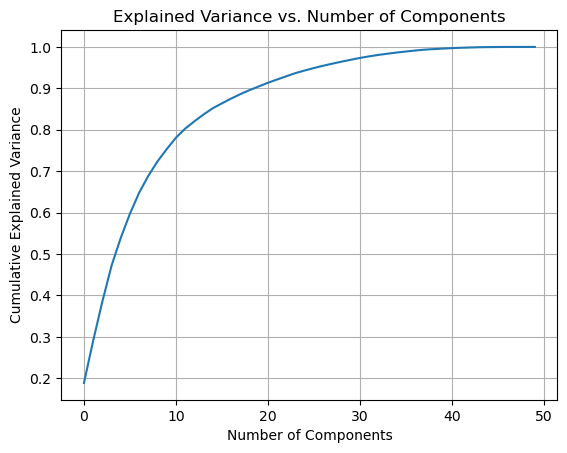

In [236]:
# Apply PCA
pca = PCA().fit(X_train)

# Plot cumulative explained variance to decide the number of components
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

Considering this graph, will try PCA with number of components=40 that is when the graph i at 1 Cumulative Explain Variance.

In [237]:
df_leads_pca = df_leads_final.copy()

# Assume df_leads_final is your original dataframe with features and target
X = df_leads_pca.drop(columns=['Converted']) 
y = df_leads_pca['Converted']            

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=40) #new number of pca
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train logistic regression on PCA-transformed data
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test_pca)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[1054   46]
 [  94  610]]
Accuracy: 0.92
Precision: 0.93
Recall: 0.87
F1 Score: 0.90


Great improve after increasing number of components to 40 <br>
Accuracy: 0.92 <br>
Precision: 0.93 <br>
Recall: 0.87 <br>
F1 Score: 0.90 <br>

***Basic baseline comparison table***

|            | Ratio      | Naive Model | Log Regression (baseline) | PCA Optimization |
|------------|------------|-------------|---------------------------|------------------|
| Accuracy   |   .38      |  .62        |   .92                     |   .92            |
| Precision  |            |  .38        |   .92                     |   .93            |
| Recall     |            |  .62        |   .87                     |   .87            |
| F1 Score   |            |  .47        |   .89                     |   .90            |



*End of Logistic Regression Section* <br>
[Back to Top](#table-of-contents)

---

## Random Forest
Running Random Forest model to see if it improves the baseline

In [239]:
df_leads_random_forest = df_leads_final.copy()

# Define features and target variable
X = df_leads_random_forest.drop(columns=['Converted'])  # Drop the target variable
y = df_leads_random_forest['Converted']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
#report = classification_report(y_test, y_pred)
#print("Classification Report:\n", report)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[1055   45]
 [  77  627]]
Accuracy: 0.93
Precision: 0.93
Recall: 0.89
F1 Score: 0.91


### Random Forests improvement from Baseline Logistic Regression</br>
Accuracy: 0.93 </br>
Precision: 0.92 </br>
Recall: 0.90 </br>
F1 Score: 0.91 </br>

***Supervised  Machine Learning Models Comparison Table*** <br>
*Log Regression (baseline) and Log Reg PCA Optimization vs. Random Forest model*


|            | Ratio      | Naive Model | Log Regression (baseline) | PCA Optimization | Random Forest |
|------------|------------|-------------|---------------------------|------------------|---------------|
| Accuracy   |   .38      |  .62        |   .92                     |   .92            |  .93          |
| Precision  |            |  .38        |   .92                     |   .93            |  .92          |
| Recall     |            |  .62        |   .87                     |   .87            |  .90          |
| F1 Score   |            |  .47        |   .89                     |   .90            |  .91          |


### Random Forests Visualizations

##### Feature Importance Visualization

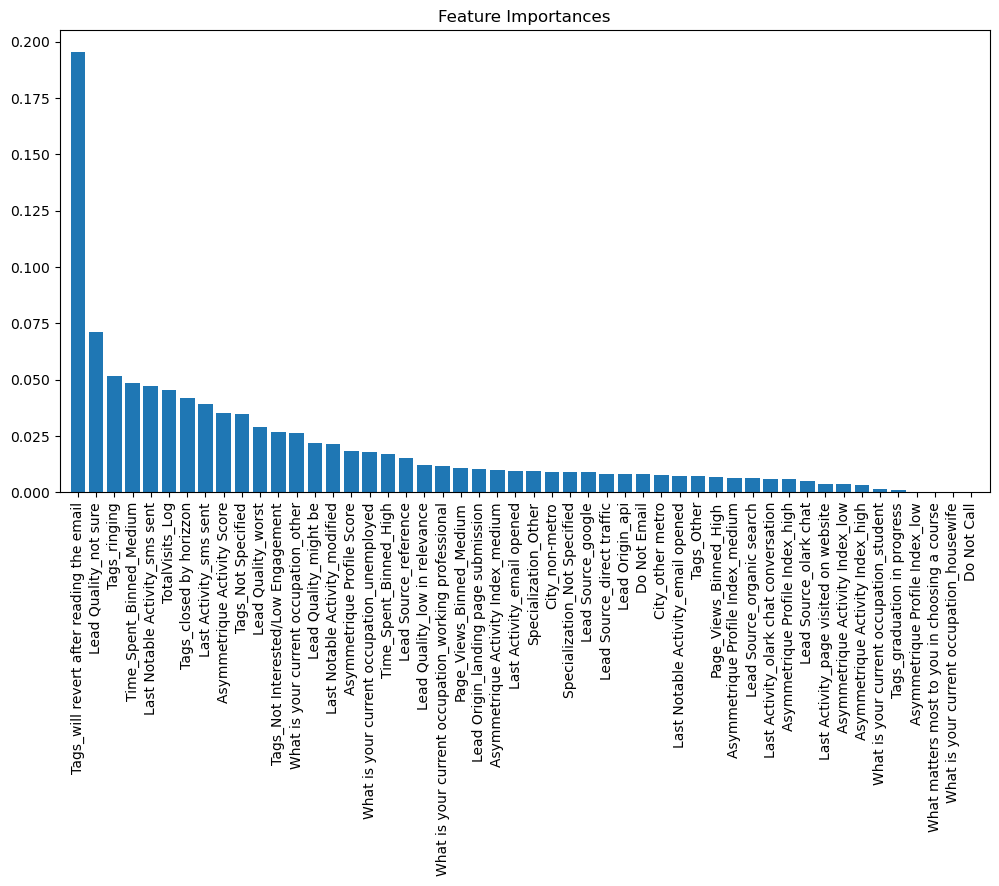

In [240]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a bar plot for feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Considering this Feature Importance, I **decided not to delete any columns** due to the fact that the model has a good performance and do not want to alter it.

### ROC Curves Comparison Logistic Regression and Random Forest
for vanilla models (Logistic Regression and Random Forest)

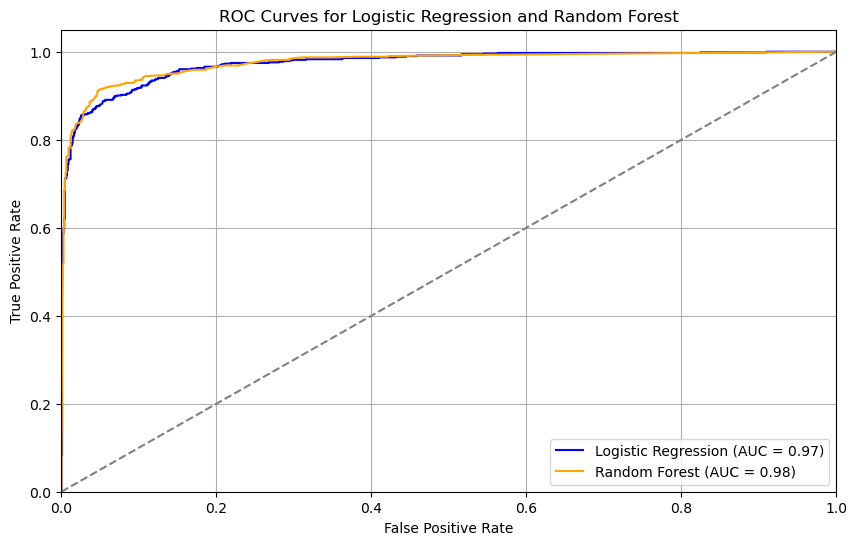

In [241]:
# Re-train the logistic regression model
log_reg_model.fit(X_train, y_train)

# Logistic Regression ROC
y_probs_log_reg = log_reg_model.predict_proba(X_test)[:, 1]  # Probability of class 1
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_probs_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Random Forest ROC
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))
plt.plot(fpr_rf, tpr_rf, color='orange', label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression and Random Forest')
plt.legend()
plt.grid()
plt.show()

##### Considering the best model to implement is Random Forest as it has a visually better ROC Curv and also has the best out-of-box results (AUC = .98), I will move forward **optimizing Random Forest model**

### Random Forest Optimization

##### Learning Curves

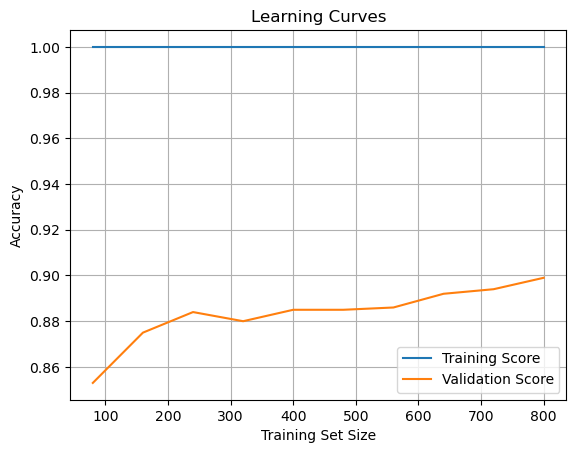

In [245]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Compute the learning curve
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, 
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate average and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, val_scores_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend()
plt.grid()
plt.show()

The gap between the training and validation scores suggests that the model may be ***overfitting*** the training data.</br>
As the training set size increases, the validation score tends to converge toward the training score, which is a positive sign. This shows that, with enough data, the model can learn patterns that are useful for both training and validation sets.</br>
</br>
Re-run with higher training set data (10x, n=10,000)

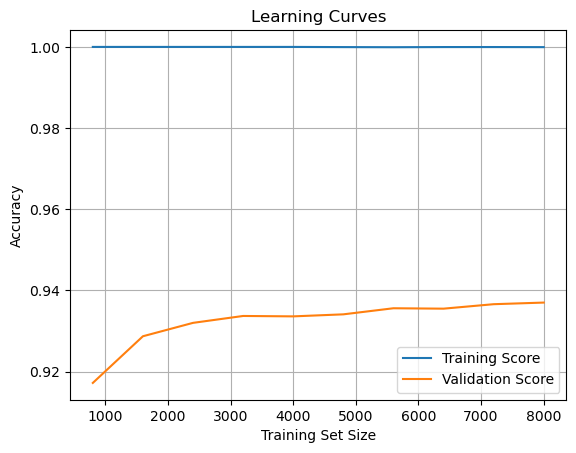

In [243]:
# Generate synthetic data
X, y = make_classification(n_samples=10000, n_features=20, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Compute the learning curve
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, 
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate average and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, val_scores_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend()
plt.grid()
plt.show()

the larger dataset helped improve the accuracy from just under 90% to 93.8%, will try a last time whith a much higher dataset (10x, n=100,000).
After running the test with larger dataset (100,000) it took >17 mins to process and unfortunatelly the results where not as expected, the validation score stabilized at 87%, way below the almost 90% with 1,000 samples, and the 93.8% for 10,000 samples.
This could be attributed to the fact that larger datasets can introduce more noise or if the synthetic data generation introduces class imbalance, this can skew the model iven more. Finally it can also be another indicatior of overfitting of the model (Randome Forest) </br>
*(Removed the code with n=10,000 as it was too long to run and did not provide any benefits)*

##### Visualizing Single Decision Tree

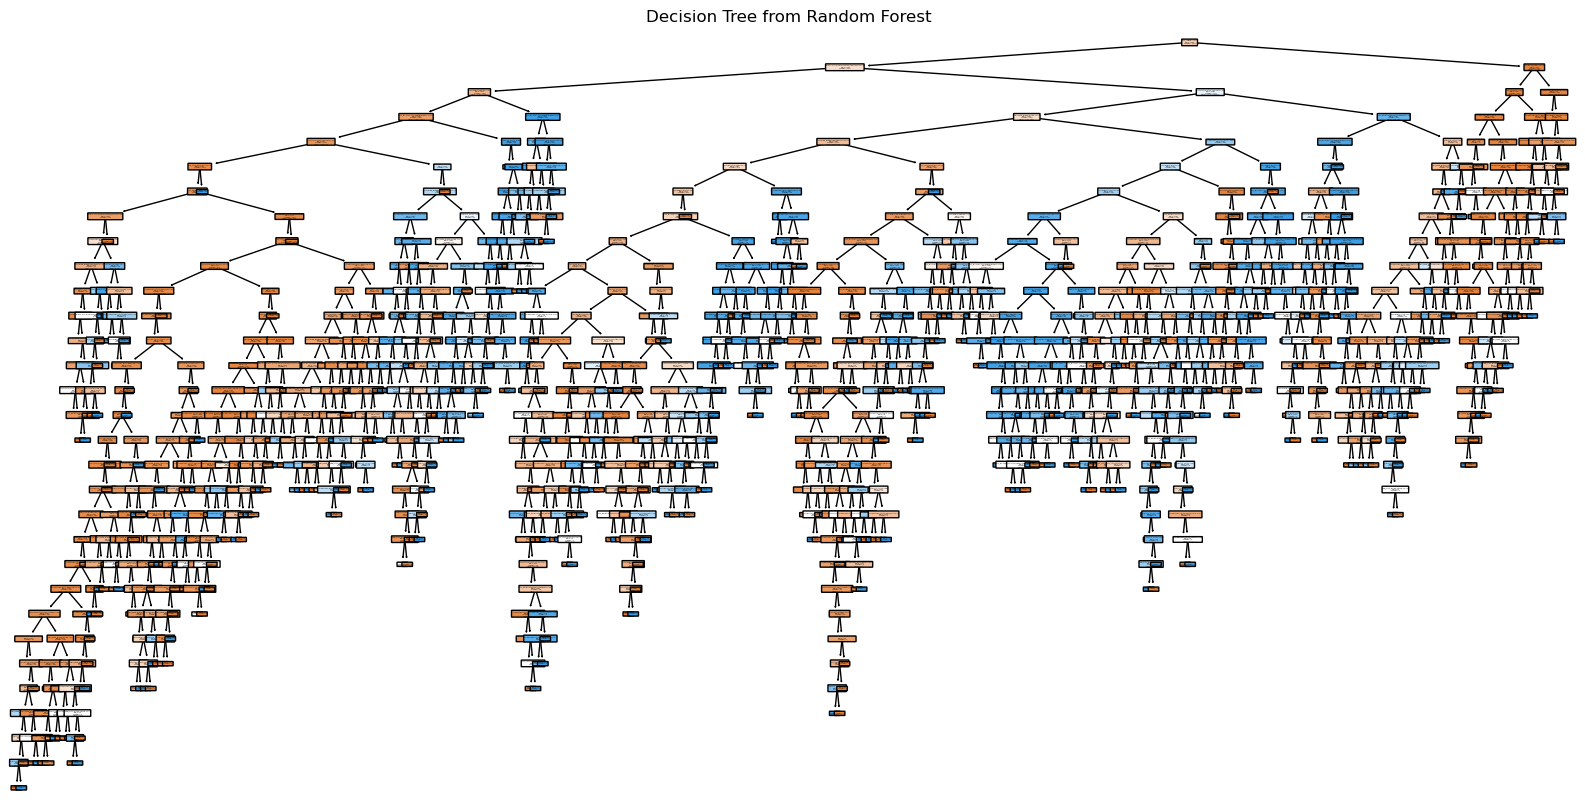

In [262]:
# Visualize the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree from Random Forest")
plt.show()

### Overfitting Random Forest

As part of the interpretation of the [learning curves](#learning-curves) above, the model seems to be ***overfitting***, some strategies to reduce it is through [Hyperparameters Tuning](#hyperparameters-tuning), [Hyperparameter Tuning GridSearchCV](#hyperparameter-tuning-gridsearchcv) and [Feature Selection](#feature-selection).

#### Hyperparametres Tuning
n_estimators - increase number of trees to improve generalization</br>
max_depth - limit max depth of each tree; shallower trees reduce risk of overfitting


In [246]:
df_leads_rf_overfitting = df_leads_final.copy()

# Define features and target variable
X = df_leads_rf_overfitting.drop(columns=['Converted']) 
y = df_leads_rf_overfitting['Converted']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=250, random_state=42) 

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
#report = classification_report(y_test, y_pred)
#print("Classification Report:\n", report)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[1053   47]
 [  70  634]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1100
           1       0.93      0.90      0.92       704

    accuracy                           0.94      1804
   macro avg       0.93      0.93      0.93      1804
weighted avg       0.94      0.94      0.93      1804

Accuracy: 0.94
Precision: 0.93
Recall: 0.90
F1 Score: 0.92


#### Hyperparameter Tuning GridSearchCV

In [248]:
# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Considering the recommendations of ***Grid SearchCV***, will implement tuning of specific parameters:</br>
max_depth: None </br>
min_samples_leaf: 1</br>
min_samples_split: 5</br>
n_estimators: 100


In [250]:
# Create a new Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=100,       # Best parameter from grid search
    max_depth=None,         # Best parameter from grid search
    min_samples_split=5,    # Best parameter from grid search
    min_samples_leaf=1,     # Best parameter from grid search
    random_state=42         # Keep the random state for reproducibility
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the new model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Print confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix_best)

# Print classification report
#report_best = classification_report(y_test, y_pred_best)
#print("Classification Report:\n", report_best)

print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")

Confusion Matrix:
 [[1061   39]
 [  70  634]]
Accuracy: 0.94
Precision: 0.94
Recall: 0.90
F1 Score: 0.92


Slight improvement on the model 
with hyperparameter tuning (GridSearchCV), the best model up till now:

|            | Log Regression (baseline) | PCA Optimization | Random Forest | RF GridSearchCV          |
|------------|---------------------------|------------------|---------------|--------------------------|
| Accuracy   |   .92                     |   .92            |  .93          |    .94                   |
| Precision  |   .92                     |   .93            |  .92          |    .94                   |
| Recall     |   .87                     |   .87            |  .90          |    .90                   |
| F1 Score   |   .89                     |   .90            |  .91          |    .92                   |


### Feature Selection
Selecting [Top 10/20 Features](#feature-importance-visualization)<br>
*last optimization try*

In [251]:
# Copy the DataFrame (assuming df_leads_final is your original DataFrame)
df_leads_rf_feat_reduccion = df_leads_final.copy()

# Define features and target variable
X = df_leads_rf_feat_reduccion.drop(columns=['Converted'])  # Drop the target variable
y = df_leads_rf_feat_reduccion['Converted']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Fit the model with training data

# Access feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort indices of the feature importances in descending order

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]:.4f})")

# Choose the number of top features you want to keep
N = 20  # Replace this with the desired number of top features

# Consider keeping only the top N important features
top_n_features = X.columns[indices[:N]] 

# Create a new DataFrame with only the selected features
X_reduced = X[top_n_features]

# Optionally, you can also update your train and test datasets
X_train_reduced = X_train[top_n_features]
X_test_reduced = X_test[top_n_features]

# Fit a new Random Forest model on the reduced feature set
best_rf_model_reduced = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                               min_samples_split=5, min_samples_leaf=1,
                                               random_state=42)

best_rf_model_reduced.fit(X_train_reduced, y_train)  # Fit the new model

# Make predictions and evaluate the new model
y_pred_reduced = best_rf_model_reduced.predict(X_test_reduced)

# Evaluate the new model
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
precision_reduced = precision_score(y_test, y_pred_reduced)
recall_reduced = recall_score(y_test, y_pred_reduced)
f1_reduced = f1_score(y_test, y_pred_reduced)

# Print evaluation metrics for the reduced model
print("Evaluation Metrics for Reduced Feature Model:")
print(f"Accuracy: {accuracy_reduced:.2f}")
print(f"Precision: {precision_reduced:.2f}")
print(f"Recall: {recall_reduced:.2f}")
print(f"F1 Score: {f1_reduced:.2f}")

# Print confusion matrix
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)
print("Confusion Matrix:\n", conf_matrix_reduced)

# Print classification report
report_reduced = classification_report(y_test, y_pred_reduced)
print("Classification Report:\n", report_reduced)

Feature ranking:
1. Feature 30 (0.1953)
2. Feature 33 (0.0711)
3. Feature 29 (0.0515)
4. Feature 46 (0.0486)
5. Feature 45 (0.0472)
6. Feature 5 (0.0453)
7. Feature 27 (0.0420)
8. Feature 16 (0.0390)
9. Feature 3 (0.0354)
10. Feature 25 (0.0347)
11. Feature 34 (0.0288)
12. Feature 24 (0.0269)
13. Feature 20 (0.0264)
14. Feature 32 (0.0218)
15. Feature 44 (0.0214)
16. Feature 4 (0.0185)
17. Feature 22 (0.0179)
18. Feature 47 (0.0168)
19. Feature 12 (0.0154)
20. Feature 31 (0.0119)
21. Feature 23 (0.0117)
22. Feature 48 (0.0108)
23. Feature 7 (0.0102)
24. Feature 39 (0.0099)
25. Feature 13 (0.0095)
26. Feature 18 (0.0093)
27. Feature 35 (0.0090)
28. Feature 17 (0.0089)
29. Feature 9 (0.0088)
30. Feature 8 (0.0082)
31. Feature 6 (0.0079)
32. Feature 0 (0.0079)
33. Feature 36 (0.0076)
34. Feature 43 (0.0074)
35. Feature 26 (0.0071)
36. Feature 49 (0.0066)
37. Feature 42 (0.0065)
38. Feature 11 (0.0063)
39. Feature 14 (0.0059)
40. Feature 40 (0.0059)
41. Feature 10 (0.0051)
42. Feature 15 (

N=20<br>
Accuracy: 0.94<br>
Precision: 0.91<br>
Recall: 0.91<br>
F1 Score: 0.91</br>
</br><br>
N=10<br>
Accuracy: 0.91<br>
Precision: 0.91<br>
Recall: 0.82<br>
F1 Score: 0.86</br>
this means that the other features even thogh they don't have a alot of data they are still valuable to the model </br>
</br>
The analysis suggests that the inclusion of a larger number of features (N=20) significantly enhances model performance in terms of accuracy and the balance between precision and recall. It indicates that while some features are less important, retaining a broader set of features helps capture the complexity of the data and improve the model's ability to predict positive cases effectively.<br>
*will not consider these optimizations as Hyperparameter Tuning GridSearcCV outperforms this stategy*




*End of Random Forest Section* <br>
[Back to Top](#table-of-contents)

---

## Deep Learning (Neural Networks)

In [264]:
df_leads_nn = df_leads_final.copy()

# Define features and target variable
X = df_leads_nn.drop(columns=['Converted']) 
y = df_leads_nn['Converted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test 20%
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #test 25%

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),        # First hidden layer
    layers.Dense(32, activation='relu'),        # Second hidden layer
    layers.Dense(1, activation='sigmoid')       # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Make predictions
predictions = model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)  

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print a classification report for more detailed metrics
#print("\nClassification Report:\n", classification_report(y_test, predicted_classes))

Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7611 - loss: 0.4811 - val_accuracy: 0.9196 - val_loss: 0.2134
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9157 - loss: 0.2125 - val_accuracy: 0.9362 - val_loss: 0.1878
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9270 - loss: 0.1868 - val_accuracy: 0.9376 - val_loss: 0.1757
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9387 - loss: 0.1669 - val_accuracy: 0.9279 - val_loss: 0.1825
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9386 - loss: 0.1646 - val_accuracy: 0.9390 - val_loss: 0.1702
Epoch 6/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9411 - loss: 0.1506 - val_accuracy: 0.9425 - val_loss: 0.1696
Epoch 7/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.1391 - val_accuracy: 0.9390 - val_loss: 0.1724
Epoch 8/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9470 - loss: 0.1425 - val_accu

### **Deep Learning** : </br>

**Test= 20%** *(keeping 20% instead of 25% due to better results)*</br>
Layers: 2 hidden layers </br>
Neurons: 64 neurons in the first layer, 32 neurons in the second layer</br>
Activation Functions: ReLU for the hidden layers, Sigmoid for the output layer </br>
Accuracy: 0.92 </br>
Precision: 0.91 </br>
Recall: 0.90 </br>
F1 Score: 0.91 </br>


**Test= 25%**</br>
Layers: 2 hidden layers </br>
Neurons: 64 neurons in the first layer, 32 neurons in the second layer</br>
Activation Functions: ReLU for the hidden layers, Sigmoid for the output layer </br>
Accuracy: 0.92</br>
Precision: 0.88</br>
Recall: 0.90</br>
F1 Score: 0.89</br>

|            | Log Regression (baseline) | PCA Optimization | Random Forest | RF Hyperparameter Tuning | Deep Learning | 
|------------|---------------------------|------------------|---------------|--------------------------|---------------|
| Accuracy   |   .92                     |   .92            |  .93          |  .94                     |  .92          |
| Precision  |   .92                     |   .93            |  .92          |  .94                     |  .91          |
| Recall     |   .87                     |   .87            |  .90          |  .90                     |  .90          |
| F1 Score   |   .89                     |   .90            |  .91          |  .92                     |  .91          |


### Deep Learning Optimization - Keras-tuner

In [266]:
# Define features and target variable
X = df_leads_nn.drop(columns=['Converted'])  
y = df_leads_nn['Converted'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine input shape
input_shape = X_train.shape[1]  

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-1, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Setup Hyperband Tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='helloworld'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Trial 90 Complete [00h 00m 59s]
val_accuracy: 0.9369369149208069

Best val_accuracy So Far: 0.9466389417648315
Total elapsed time: 00h 23m 54s


c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


57/57 - 1s - 10ms/step - accuracy: 0.9041 - loss: 0.3548
Loss: 0.3547735810279846, Accuracy: 0.9041019678115845


In [267]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'units': 512,
 'learning_rate': 0.0002916696467305876,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0070'}

Trial 90 Complete [00h 00m 39s]
val_accuracy: 0.939708948135376

Best val_accuracy So Far: 0.9480249285697937
Total elapsed time: 00h 17m 09s

In [258]:
# Get the best model from Keras Tuner
best_model = tuner.get_best_models(num_models=1)[0]

#Evaluate the model on the test data for accuracy
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions from the model on test data
y_pred_prob = best_model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

#Calculate Precision, Recall, and F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Print the full classification report and confusion matrix
#print("\nClassification Report:")
#print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9304 - loss: 0.1794
Test Accuracy: 0.9368
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.9368
Precision: 0.9483
Recall: 0.8864
F1 Score: 0.9163

Confusion Matrix:
[[1066   34]
 [  80  624]]


|            | Log Regression (baseline) | PCA Optimization | Random Forest | RF Hyperparameter Tuning | Deep Learning | Keras Tuner |
|------------|---------------------------|------------------|---------------|--------------------------|---------------|-------------|
| Accuracy   |   .92                     |   .92            |  .93          |  .94                     |  .92          |  .94        |
| Precision  |   .92                     |   .93            |  .92          |  .94                     |  .91          |  .95        |
| Recall     |   .87                     |   .87            |  .90          |  .90                     |  .90          |  .89        |
| F1 Score   |   .89                     |   .90            |  .91          |  .92                     |  .91          |  .91        |


---
testing keras tuner method that we saw in class

In [272]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=X_train.shape[1]))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Trial 56 Complete [00h 00m 23s]
val_accuracy: 0.6097561120986938

Best val_accuracy So Far: 0.9401330351829529
Total elapsed time: 00h 17m 03s
57/57 - 1s - 12ms/step - accuracy: 0.9401 - loss: 0.1813
Loss: 0.18127714097499847, Accuracy: 0.9401330351829529


*End of Deep Learning (Neural Networks) Section* <br>
[Back to Top](#table-of-contents)

---

### ROC Curves Logistic Regression, Random Forest and Neural Network

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


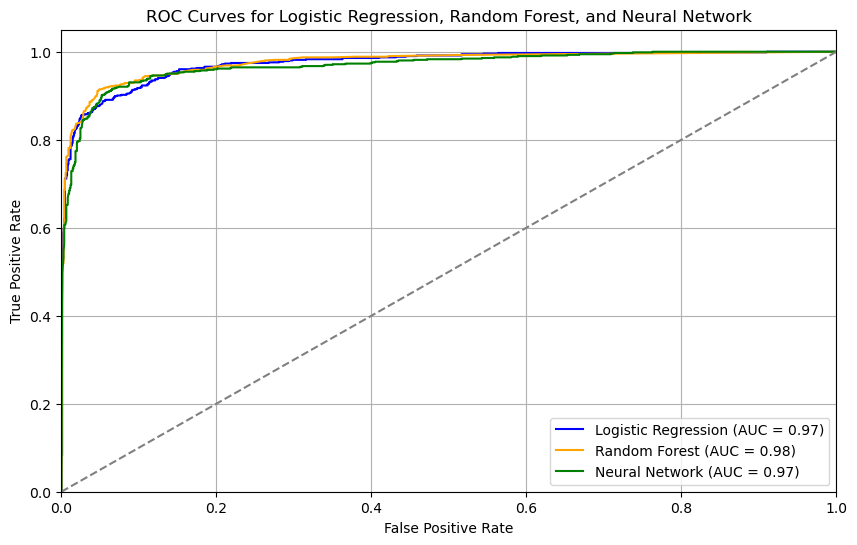

In [259]:
# Get probabilities from the neural network (Deep Learning Model)
y_probs_nn = model.predict(X_test_scaled)[:, 0]  # Probability of class 1 (converted leads)

# Calculate the ROC curve and AUC for the neural network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_probs_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves for all three models
plt.figure(figsize=(10, 6))

# Logistic Regression ROC Curve
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))

# Random Forest ROC Curve
plt.plot(fpr_rf, tpr_rf, color='orange', label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))

# Neural Network ROC Curve
plt.plot(fpr_nn, tpr_nn, color='green', label='Neural Network (AUC = {:.2f})'.format(roc_auc_nn))

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression, Random Forest, and Neural Network')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.grid()
plt.show()

ROC Curve:

The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate for different classification thresholds.
A curve closer to the top-left corner indicates better performance because it suggests the model is achieving a higher true positive rate with a lower false positive rate.
Higher AUC values mean better model performance in distinguishing between converted and not converted leads.

**Conclusion:**
Random Forest is the top performer in this case, slightly outperforming both Logistic Regression and the Neural Network.
Logistic Regression and the Neural Network are nearly identical in performance, making them both strong models for this task.

*End of Model Implementation Section* <br>
[Back to Top](#table-of-contents)

---
---

## Conclusions

##### Models Performance

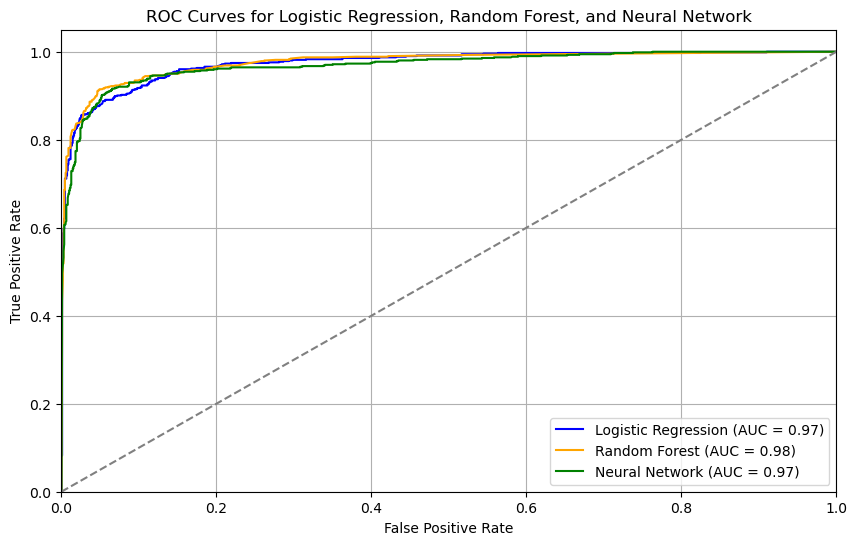

|            | Log Regression (baseline) | PCA Optimization | Random Forest | RF Hyperparameter Tuning | Deep Learning | Keras Tuner |
|------------|---------------------------|------------------|---------------|--------------------------|---------------|-------------|
| Accuracy   |   .92                     |   .92            |  .93          |  .94                     |  .92          |  .94        |
| Precision  |   .92                     |   .93            |  .92          |  .94                     |  .91          |  .95        |
| Recall     |   .87                     |   .87            |  .90          |  .90                     |  .90          |  .89        |
| F1 Score   |   .89                     |   .90            |  .91          |  .92                     |  .91          |  .91        |



### Conclusion:<br>
The goal of this project was to boost lead conversion rates (which started at 38%) by building a model that could better predict which leads would convert. Multiple models were tested, including Logistic Regression (as a baseline), PCA optimization for the Logistic Regression model, Random Forest, Hyperparameter Tuning with GridSearchCV, Deep Learning, and Keras Tuner. Given the ROC curves and results for Accuracy, Precision, Recall, and F1, here are some key observations:

##### **Process Overview:**<br>
The dataset used for this project was large, with 9,241 rows and 37 columns, containing both categorical and numerical data. Each column was carefully analyzed during **Exploratory Data Analysis (EDA)** to understand distributions, correlations, and data patterns. **Feature Engineering** was performed to create new variables based on user engagement levels, improving the predictive power of the models. Data preprocessing included:<br>

- *Numerical scaling*: Ensuring that numeric features were standardized using scaling techniques.<br>
- *Categorical encoding*: Applying one-hot encoding to handle categorical features, making them usable in machine learning models.<br>
Three primary models were implemented: ***Logistic Regression, Random Forest, and Deep Learning, with hyperparameter tuning*** applied to optimize their performance.

##### **Class Imbalance:**<br>
A key challenge in the dataset was a significant class imbalance, with **5,594 "not converted"** leads compared to **3,425 "converted" leads**. This imbalance could have impacted the model’s performance, particularly for Logistic Regression, as it tends to be biased toward the majority class. Therefore, we prioritized evaluation metrics like ***Precision, Recall, and F1 Score*** to account for the imbalance and measure the model’s effectiveness in identifying leads that would convert.

Despite the class imbalance, all models performed well due to the careful **feature engineering and data preprocessing** steps taken. The models were further optimized with hyperparameter tuning, leading to even better results. The success criteria set at the beginning—achieving over **85% accuracy**—was comfortably met by all models.

##### **Accuracy:**<br>
Most models achieved high accuracy, ranging from ***92% to 94%***. While accuracy is an important indicator, focusing on it alone doesn’t provide a full understanding of the model's business impact, especially in the context of lead conversion.

##### **Precision and Recall:*
**Precision:** Particularly crucial for sales lead generation, precision was as high as 95% in the Keras Tuner model. This means that fewer false positives (leads unlikely to convert) were predicted, streamlining the sales process and reducing unnecessary effort. The team can focus more on high-quality leads, saving both time and resources.<br>
**Recall:** Models like Random Forest, Hyperparameter Tuning, and Deep Learning had recall scores as high as 90%, meaning they successfully captured a large portion of leads that could convert. This ensures that valuable opportunities were not missed.<br>
##### **F1 Score:**<br>
The F1 score, which balances precision and recall, was solid across all models (up to 92%), indicating a good overall balance between correctly identifying converting leads and avoiding false positives.

##### **Business Impact:**<br>
This model helps the sales team focus on the best leads, leading to more conversions with less effort. Without a model, the sales team might treat all leads equally, wasting time on less likely prospects. By using the model’s predictions, the team can prioritize high-probability leads, working more efficiently and increasing conversions.

- *Fewer False Positives*: High precision means sales reps spend less time chasing dead-end leads, allowing them to zero in on the ones that are truly likely to convert.<br>
- *Higher Coverage of Potential Leads:* High recall ensures the team isn’t missing out on any important opportunities.<br>
This leads to **cost savings**, as the sales team can work more efficiently, focusing their efforts where they matter most. Automating the lead scoring process also eliminates the need for manual lead qualification, lowering operational costs.

##### **Recommendation:**
Given the results, the **Random Forest model with Hyperparameter Tuning** is recommended. It strikes the best balance between precision, recall, and accuracy, making it the optimal solution to help the sales team prioritize high-quality leads and boost conversions while saving resources. Additionally, despite the initial class imbalance in the dataset, the models performed exceptionally well due to thorough analysis, feature engineering, and tuning efforts.

This success meets the original project criteria, with all models achieving the target of over **85% accuracy.**


*End of Conclusions* <br>
*The End, YL*<br><br>
[Back to Top](#table-of-contents)

---
---
---